In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import optuna
from sklearn.model_selection import train_test_split
import catboost as cb
from catboost import CatBoostClassifier
from catboost import Pool, cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

import xgboost as xgb

In [2]:
df= pd.read_csv(r"C:\Users\jvrdo\Downloads\potencijalni_neo.csv")


In [3]:
df

,dob,velicina_tumora,focality,hist_tip,gradus,er,pr,her2_sish,ki67,broj_meta
0,58,3.0,solitaran,NOS invazivni karcinom,2,3,0,3.0,25.0,0
1,70,7.0,solitaran,lobularni invazivni,3,100,0,1.0,48.0,0
2,58,2.3,solitaran,Ca s medularnim karakteristikama,3,10,0,1.0,80.0,0
3,41,5.5,multifokalan,NOS invazivni karcinom,3,100,5,3.0,40.0,1
4,63,2.2,solitaran,NOS invazivni karcinom,3,0,0,3.0,35.0,1
...,...,...,...,...,...,...,...,...,...,...
771,76,3.2,solitaran,NOS invazivni karcinom,3,0,0,1.0,70.0,0
772,77,6.5,difuzno infiltrirajući,NOS invazivni karcinom,3,0,0,1.0,85.0,0
773,74,6.5,solitaran,NOS invazivni karcinom,2,90,40,1.0,35.0,1
774,68,8.5,difuzno infiltrirajući,lobularni invazivni,2,80,5,0.0,10.0,1


In [5]:
# Dummy encoding categorical variables
df_d= pd.get_dummies(df, columns=["focality","hist_tip"], drop_first=True)

In [6]:
X= df_d.drop(["broj_meta",], axis=1)
y= df_d["broj_meta"]

In [8]:
# New train test split after encoding categorical variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=68)

## Random Forrest

In [9]:
rf = RandomForestClassifier( random_state=68)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=68)

In [11]:
y_pred = rf.predict_proba(X_test)

y_pred= y_pred[:,1].reshape(-1,1)

In [12]:
roc_auc_score(y_test, y_pred)

0.7613168724279835

## RF optimization

In [13]:
# parameter grid
pgrid = {    
    'max_depth' : [50,200,300],    
    'min_samples_split' : [3, 10,20,30],
    'min_samples_leaf' : [1,3,6,10,20,30],
    'class_weight': ['balanced','balanced_subsample']
}

# specifying the cv
cv_skf = StratifiedKFold(n_splits=5, random_state=68, shuffle=True)

# specifying the model 
rfgs = BalancedRandomForestClassifier(n_jobs=-1)



# specify the grid search cv
c = HalvingGridSearchCV(estimator=rfgs,param_grid=pgrid,cv=cv_skf,n_jobs=-1,verbose=1, scoring='roc_auc',random_state=68)

cc= c.fit(X_train,y_train)

n_iterations: 4
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 20
max_resources_: 659
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 144
n_resources: 20
Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


----------
iter: 1
n_candidates: 48
n_resources: 60
Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        n

----------
iter: 2
n_candidates: 16
n_resources: 180
Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        n

----------
iter: 3
n_candidates: 6
n_resources: 540
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        n

In [14]:
c_pred= cc.predict_proba(X_test)
c_pred= c_pred[:,1].reshape(-1,1)

In [15]:
roc_auc_score(y_test, c_pred)

0.7766019988242211

In [32]:
# Printing best parameters
cc.best_params_

{'class_weight': 'balanced',
 'max_depth': 200,
 'min_samples_leaf': 6,
 'min_samples_split': 30}

In [20]:
# Importing libraries for roc-auc and precision recall curve visualizations
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import binarize
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [21]:
def plot_precision_recall_curve(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('Positive node', average_precision_score(t_y,p_y)))
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')
    return precision, recall, thresholds

(array([0.53846154, 0.53448276, 0.53913043, 0.54385965, 0.54867257,
        0.54464286, 0.54954955, 0.54545455, 0.55045872, 0.55555556,
        0.56074766, 0.56603774, 0.57142857, 0.56730769, 0.57281553,
        0.57843137, 0.57425743, 0.58      , 0.58585859, 0.59183673,
        0.58762887, 0.59375   , 0.6       , 0.60638298, 0.61290323,
        0.61956522, 0.61538462, 0.62222222, 0.62921348, 0.63636364,
        0.64367816, 0.63953488, 0.63529412, 0.64285714, 0.65060241,
        0.64634146, 0.65432099, 0.6625    , 0.67088608, 0.67948718,
        0.68831169, 0.69736842, 0.69333333, 0.7027027 , 0.69863014,
        0.69444444, 0.70422535, 0.7       , 0.71014493, 0.72058824,
        0.73134328, 0.74242424, 0.75384615, 0.765625  , 0.77777778,
        0.77419355, 0.7704918 , 0.78333333, 0.79661017, 0.79310345,
        0.78947368, 0.80357143, 0.8       , 0.7962963 , 0.81132075,
        0.80769231, 0.82352941, 0.82      , 0.81632653, 0.8125    ,
        0.82978723, 0.82608696, 0.82222222, 0.81

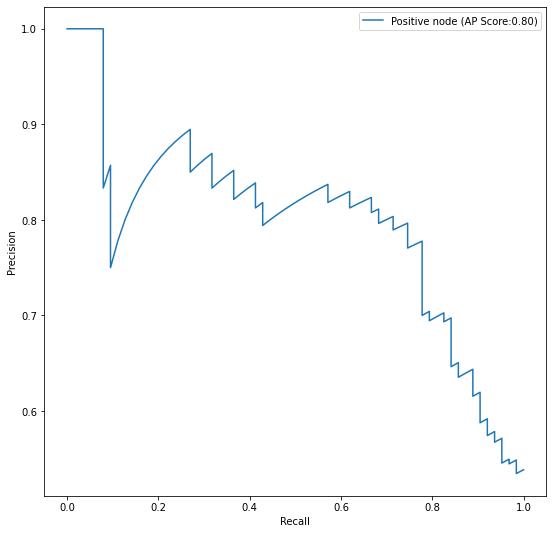

In [22]:
plot_precision_recall_curve(y_test,c_pred)

In [24]:
def plot_roc_curve(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    fpr, tpr, thresholds = roc_curve(t_y, p_y)
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('Positive node', auc(fpr, tpr)))
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

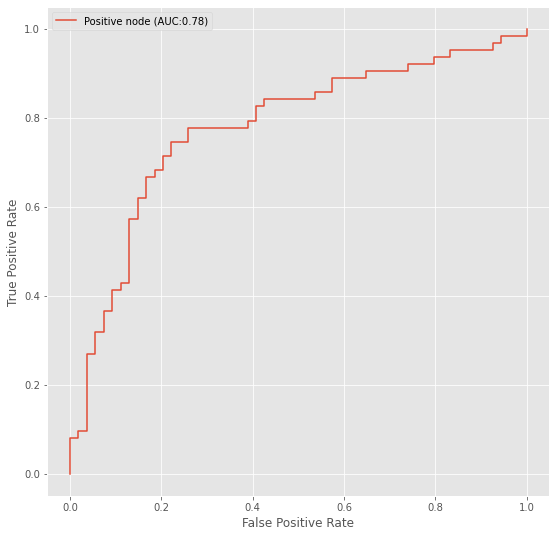

In [31]:
plot_roc_curve(y_test, c_pred)
plt.style.use("ggplot")
plt.show()

## XGBoost with Optuna

In [34]:
def objective(trial, data=X, target=y):
    X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.15, random_state=68)

    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 31),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.005, 0.02, 0.05, 0.08, 0.1]),
        'n_estimators': trial.suggest_int('n_estimators', 200, 8000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'gamma': trial.suggest_float('gamma', 0.0001, 1.0, log = True),
        'alpha': trial.suggest_float('alpha', 0.0001, 10.0, log = True),
        'lambda': trial.suggest_float('lambda', 0.0001, 10.0, log = True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.8),
        'subsample': trial.suggest_float('subsample', 0.1, 0.8),
        
        'booster': 'gbtree',
        'random_state': 68,
        'use_label_encoder': False,
        'eval_metric': 'auc'

    }
    
    model = xgb.XGBClassifier(**params)  
    model.fit(X_train, y_train, eval_set = [(X_val,y_val)], early_stopping_rounds = 333, verbose = False)
    y_pred = model.predict_proba(X_val)[:,1]
    roc_auc = roc_auc_score(y_val, y_pred)

    return roc_auc
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)
print('Best value: ', study.best_value)

[I 2022-09-27 13:22:59,974] A new study created in memory with name: no-name-ee1223b9-ee10-4d30-8abf-787ac25229ae
C:\Users\jvrdo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-09-27 13:23:00,114] Trial 0 finished with value: 0.5 and parameters: {'max_depth': 14, 'learning_rate': 0.08, 'n_estimators': 1402, 'min_child_weight': 176, 'gamma': 0.0004339296886320369, 'alpha': 5.957839546645065, 'lambda': 1.9663205555572125, 'colsample_bytree': 0.46383997025364254, 'subsample': 0.7533596249356296}. Best is trial 0 with value: 0.5.
C:\Users\jvrdo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

Best value:  0.8274544385655496


Trial 444 finished with value: 0.8274544385655496 and parameters: {'max_depth': 19, 'learning_rate': 0.1, 'n_estimators': 2211, 'min_child_weight': 1, 'gamma': 0.007857613073094759, 'alpha': 0.04285059005535105, 'lambda': 0.11951561366911526, 'colsample_bytree': 0.7467390701849955, 'subsample': 0.45329553678755585}. Best is trial 444 with value: 0.8274544385655496.

In [106]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=68)

In [107]:
# Initiating optimized version
# tree_method="gpu_hist", subsample=0.4532, colsample_bytree=0.7467, learning_rate=0.1, max_depth=19, n_estimators=2211, min_child_weight=1, gamma=0.0078, alpha=0.0428, reg_lambda=0.1195
xgc = xgb.XGBClassifier(
      subsample=0.45329553678755585, colsample_bytree=0.7467390701849955, learning_rate=0.1, max_depth=19, n_estimators=200, min_child_weight=1, gamma= 0.007857613073094759, 
    alpha= 0.04285059005535105, reg_lambda=0.11951561366911526
    
)

# Fitting the model
xgc.fit(X_train, y_train)

XGBClassifier(alpha=0.04285059005535105, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7467390701849955, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.007857613073094759, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=19, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.0428505912, ...)

In [108]:
# Optimized XBG predictions
y_pred_xn= xgc.predict_proba(X_val)

y_pred_xn= y_pred_xn[:,1].reshape(-1,1)

In [109]:
# Optimized XGB score
roc_auc_score(y_val, y_pred_xn)

0.6916519694297472

In [104]:
study.best_params

{'max_depth': 19,
 'learning_rate': 0.1,
 'n_estimators': 2211,
 'min_child_weight': 1,
 'gamma': 0.007857613073094759,
 'alpha': 0.04285059005535105,
 'lambda': 0.11951561366911526,
 'colsample_bytree': 0.7467390701849955,
 'subsample': 0.45329553678755585}

## CatBoost

In [111]:
# Picking categorical columns
categorical_features_indices = np.where(X_train.dtypes != float)[0]

In [112]:
train_dataset = cb.Pool(data=X_train,
                     label=y_train,
                     cat_features = categorical_features_indices) 
test_dataset = cb.Pool(X_test, y_test,cat_features = categorical_features_indices)

In [113]:
# specifying the cv


def objective(trial):
    param = {
        
        "max_depth":trial.suggest_int("max_depth", 3, 16),
        "n_estimators":trial.suggest_int("n_estimators", 100, 6000),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.2),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'bagging_temperature':trial.suggest_int("bagging_temperature", 0,10),
        'max_bin':trial.suggest_categorical('max_bin', [10,200,400]),
        'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        
        'od_type' : "Iter",
        'od_wait' : 100,
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 1),
         'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
        'custom_metric' : ['AUC'],
        "loss_function": "Logloss",
        
        'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        }

    scores = cv(train_dataset,
            param,
            fold_count=5, 
            early_stopping_rounds=15,         
            plot=False, verbose=False)

    return scores['test-AUC-mean'].max()

In [ ]:
sampler = optuna.samplers.TPESampler(seed=42)  # Make the sampler behave in a deterministic way.
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=300)

[I 2022-09-27 14:01:31,418] A new study created in memory with name: no-name-dba17b20-38d6-419b-a28a-f25ad68b68ce


Training on fold [0/5]

bestTest = 0.6347895603
bestIteration = 24

Training on fold [1/5]

bestTest = 0.6238006255
bestIteration = 9

Training on fold [2/5]

bestTest = 0.6497349382
bestIteration = 10

Training on fold [3/5]

bestTest = 0.5823296232


[I 2022-09-27 14:01:31,917] Trial 0 finished with value: 0.6996777855171168 and parameters: {'max_depth': 8, 'n_estimators': 5710, 'min_data_in_leaf': 74, 'learning_rate': 0.12013303835521029, 'random_strength': 2, 'bagging_temperature': 1, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.04566054873446119, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.6996777855171168.


bestIteration = 47

Training on fold [4/5]

bestTest = 0.6437818254
bestIteration = 21

Training on fold [0/5]

bestTest = 0.6303520892
bestIteration = 40

Training on fold [1/5]

bestTest = 0.6314345777
bestIteration = 37

Training on fold [2/5]

bestTest = 0.6480148353
bestIteration = 36

Training on fold [3/5]

bestTest = 0.6187794107
bestIteration = 31

Training on fold [4/5]


[I 2022-09-27 14:01:36,313] Trial 1 finished with value: 0.7075753940613472 and parameters: {'max_depth': 4, 'n_estimators': 1823, 'min_data_in_leaf': 37, 'learning_rate': 0.09175792685919015, 'random_strength': 8, 'bagging_temperature': 2, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.39001768308022033, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 1 with value: 0.7075753940613472.



bestTest = 0.6261300478
bestIteration = 22

Training on fold [0/5]

bestTest = 0.5810982849
bestIteration = 99

Training on fold [1/5]

bestTest = 0.6217343077
bestIteration = 44

Training on fold [2/5]

bestTest = 0.6466423447
bestIteration = 31

Training on fold [3/5]

bestTest = 0.6204223149
bestIteration = 43

Training on fold [4/5]


[I 2022-09-27 14:01:41,081] Trial 2 finished with value: 0.6988450971287052 and parameters: {'max_depth': 3, 'n_estimators': 5465, 'min_data_in_leaf': 26, 'learning_rate': 0.13284193458644242, 'random_strength': 4, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.0006070155694141794, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 1 with value: 0.7075753940613472.



bestTest = 0.6516841929
bestIteration = 38

Training on fold [0/5]

bestTest = 0.6491952014
bestIteration = 52

Training on fold [1/5]

bestTest = 0.6198126601
bestIteration = 98

Training on fold [2/5]

bestTest = 0.6589531415
bestIteration = 43

Training on fold [3/5]


[I 2022-09-27 14:01:41,704] Trial 3 finished with value: 0.6968409952790032 and parameters: {'max_depth': 7, 'n_estimators': 1757, 'min_data_in_leaf': 55, 'learning_rate': 0.02904392076997777, 'random_strength': 9, 'bagging_temperature': 0, 'max_bin': 10, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.006792933207180863, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 1 with value: 0.7075753940613472.



bestTest = 0.557229643
bestIteration = 195

Training on fold [4/5]

bestTest = 0.6586366468
bestIteration = 67

Training on fold [0/5]

bestTest = 0.6554268497
bestIteration = 7

Training on fold [1/5]

bestTest = 0.6302971413
bestIteration = 16

Training on fold [2/5]

bestTest = 0.6264613538
bestIteration = 27

Training on fold [3/5]



[I 2022-09-27 14:01:42,015] Trial 4 finished with value: 0.7043957511028558 and parameters: {'max_depth': 7, 'n_estimators': 2018, 'min_data_in_leaf': 73, 'learning_rate': 0.12787393679968742, 'random_strength': 9, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.00015200666650051572, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 1 with value: 0.7075753940613472.


bestTest = 0.5733793616
bestIteration = 27

Training on fold [4/5]

bestTest = 0.6584916902
bestIteration = 13

Training on fold [0/5]

bestTest = 0.624758164
bestIteration = 36

Training on fold [1/5]

bestTest = 0.6278192556
bestIteration = 32

Training on fold [2/5]

bestTest = 0.6517111523
bestIteration = 19

Training on fold [3/5]

bestTest = 0.5795546202
bestIteration = 55

Training on fold [4/5]


[I 2022-09-27 14:01:42,375] Trial 5 finished with value: 0.705348657224673 and parameters: {'max_depth': 6, 'n_estimators': 2521, 'min_data_in_leaf': 76, 'learning_rate': 0.046530834932832874, 'random_strength': 1, 'bagging_temperature': 3, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 3.108568709174384e-07, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 1 with value: 0.7075753940613472.



bestTest = 0.6605734668
bestIteration = 22

Training on fold [0/5]

bestTest = 0.6424149987
bestIteration = 9

Training on fold [1/5]

bestTest = 0.6476499754
bestIteration = 9

Training on fold [2/5]

bestTest = 0.681589003
bestIteration = 20

Training on fold [3/5]

bestTest = 0.6367881292
bestIteration = 13

Training on fold [4/5]


[I 2022-09-27 14:02:12,759] Trial 6 finished with value: 0.6826034491654414 and parameters: {'max_depth': 14, 'n_estimators': 5179, 'min_data_in_leaf': 1, 'learning_rate': 0.10263871321293559, 'random_strength': 5, 'bagging_temperature': 2, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 8.110298132030929e-06, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 1 with value: 0.7075753940613472.



bestTest = 0.6392110791
bestIteration = 31

Training on fold [0/5]

bestTest = 0.6653090388
bestIteration = 1

Training on fold [1/5]

bestTest = 0.6428058303
bestIteration = 2

Training on fold [2/5]

bestTest = 0.6689965153
bestIteration = 3

Training on fold [3/5]


[I 2022-09-27 14:02:13,041] Trial 7 finished with value: 0.6858159198204474 and parameters: {'max_depth': 10, 'n_estimators': 403, 'min_data_in_leaf': 28, 'learning_rate': 0.1817449113073641, 'random_strength': 3, 'bagging_temperature': 1, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.0066946948903108105, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 1 with value: 0.7075753940613472.



bestTest = 0.5919509734
bestIteration = 17

Training on fold [4/5]

bestTest = 0.6710870629
bestIteration = 1

Training on fold [0/5]

bestTest = 0.6430867066
bestIteration = 467

Training on fold [1/5]

bestTest = 0.6288658838
bestIteration = 698

Training on fold [2/5]

bestTest = 0.6510188255
bestIteration = 427

Training on fold [3/5]

bestTest = 0.6087510152
bestIteration = 1019

Training on fold [4/5]


[I 2022-09-27 14:02:53,574] Trial 8 finished with value: 0.7012317158114698 and parameters: {'max_depth': 3, 'n_estimators': 3586, 'min_data_in_leaf': 68, 'learning_rate': 0.004300977956643375, 'random_strength': 6, 'bagging_temperature': 2, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 5.352181202453714e-06, 'one_hot_max_size': 10, 'auto_class_weights': 'Balanced'}. Best is trial 1 with value: 0.7075753940613472.



bestTest = 0.6501094239
bestIteration = 407

Training on fold [0/5]

bestTest = 0.6765777048
bestIteration = 1

Training on fold [1/5]

bestTest = 0.6482420574
bestIteration = 2

Training on fold [2/5]

bestTest = 0.6910455506
bestIteration = 0

Training on fold [3/5]

bestTest = 0.6226168592
bestIteration = 14

Training on fold [4/5]


[I 2022-09-27 14:02:56,312] Trial 9 finished with value: 0.6894425096096793 and parameters: {'max_depth': 6, 'n_estimators': 649, 'min_data_in_leaf': 90, 'learning_rate': 0.18018319337550276, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 4.7110717644496196e-08, 'one_hot_max_size': 10, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 1 with value: 0.7075753940613472.



bestTest = 0.6499132607
bestIteration = 5

Training on fold [0/5]

bestTest = 0.6438915704
bestIteration = 54

Training on fold [1/5]

bestTest = 0.6303325563
bestIteration = 28

Training on fold [2/5]

bestTest = 0.6538766727
bestIteration = 20

Training on fold [3/5]

bestTest = 0.636605434
bestIteration = 17

Training on fold [4/5]


[I 2022-09-27 14:03:03,095] Trial 10 finished with value: 0.6876024817480586 and parameters: {'max_depth': 12, 'n_estimators': 3754, 'min_data_in_leaf': 36, 'learning_rate': 0.07002332738991777, 'random_strength': 10, 'bagging_temperature': 9, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.5778393225026376, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 1 with value: 0.7075753940613472.



bestTest = 0.6523694471
bestIteration = 22

Training on fold [0/5]

bestTest = 0.6127124767
bestIteration = 13

Training on fold [1/5]

bestTest = 0.6636848158
bestIteration = 12

Training on fold [2/5]

bestTest = 0.6500770046
bestIteration = 10

Training on fold [3/5]


[I 2022-09-27 14:03:03,379] Trial 11 finished with value: 0.6958807367850786 and parameters: {'max_depth': 5, 'n_estimators': 2479, 'min_data_in_leaf': 48, 'learning_rate': 0.06651470120323348, 'random_strength': 1, 'bagging_temperature': 4, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 1.1453795702408633e-08, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 1 with value: 0.7075753940613472.



bestTest = 0.6028820406
bestIteration = 43

Training on fold [4/5]

bestTest = 0.6650151394
bestIteration = 6

Training on fold [0/5]

bestTest = 0.6471854336
bestIteration = 23

Training on fold [1/5]

bestTest = 0.6233456068
bestIteration = 33

Training on fold [2/5]


[I 2022-09-27 14:03:03,685] Trial 12 finished with value: 0.7141936898588861 and parameters: {'max_depth': 4, 'n_estimators': 1250, 'min_data_in_leaf': 98, 'learning_rate': 0.06493303914192565, 'random_strength': 7, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 5.509687965536228e-07, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.6424080701
bestIteration = 28

Training on fold [3/5]

bestTest = 0.5949912102
bestIteration = 34

Training on fold [4/5]

bestTest = 0.6520619983
bestIteration = 17

Training on fold [0/5]

bestTest = 0.6387342253
bestIteration = 17

Training on fold [1/5]

bestTest = 0.6328309238
bestIteration = 25

Training on fold [2/5]

bestTest = 0.691484426
bestIteration = 0

Training on fold [3/5]

bestTest = 0.66384233
bestIteration = 16

Training on fold [4/5]


[I 2022-09-27 14:03:11,362] Trial 13 finished with value: 0.6609924412455175 and parameters: {'max_depth': 16, 'n_estimators': 1371, 'min_data_in_leaf': 100, 'learning_rate': 0.08814591262459921, 'random_strength': 7, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 2.0657751956921992e-06, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.6621735439
bestIteration = 1

Training on fold [0/5]

bestTest = 0.6235202111
bestIteration = 87

Training on fold [1/5]

bestTest = 0.6339493249
bestIteration = 70

Training on fold [2/5]

bestTest = 0.6421456034
bestIteration = 67

Training on fold [3/5]


[I 2022-09-27 14:03:11,926] Trial 14 finished with value: 0.7083573252844206 and parameters: {'max_depth': 4, 'n_estimators': 957, 'min_data_in_leaf': 9, 'learning_rate': 0.042723752512805815, 'random_strength': 8, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.976283614972477, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.5776493901
bestIteration = 200

Training on fold [4/5]

bestTest = 0.6437782199
bestIteration = 77

Training on fold [0/5]

bestTest = 0.6412872114
bestIteration = 31

Training on fold [1/5]

bestTest = 0.6444195691
bestIteration = 28

Training on fold [2/5]

bestTest = 0.6429455435
bestIteration = 30

Training on fold [3/5]


[I 2022-09-27 14:03:12,583] Trial 15 finished with value: 0.6990393545391225 and parameters: {'max_depth': 9, 'n_estimators': 104, 'min_data_in_leaf': 1, 'learning_rate': 0.027969770168746053, 'random_strength': 6, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 6.891602254590411e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.5976537012
bestIteration = 84

Training on fold [4/5]

bestTest = 0.6531168406
bestIteration = 37

Training on fold [0/5]

bestTest = 0.6481480811
bestIteration = 11

Training on fold [1/5]

bestTest = 0.6884958109
bestIteration = 0

Training on fold [2/5]

bestTest = 0.661773295
bestIteration = 7

Training on fold [3/5]


[I 2022-09-27 14:03:13,030] Trial 16 finished with value: 0.6807610995021026 and parameters: {'max_depth': 10, 'n_estimators': 1042, 'min_data_in_leaf': 14, 'learning_rate': 0.052666190645201075, 'random_strength': 8, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 2.927135632723583e-07, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.6177723828
bestIteration = 13

Training on fold [4/5]

bestTest = 0.6592380769
bestIteration = 13

Training on fold [0/5]

bestTest = 0.6402947411
bestIteration = 232

Training on fold [1/5]

bestTest = 0.6374069869
bestIteration = 218

Training on fold [2/5]

bestTest = 0.6550120457
bestIteration = 190

Training on fold [3/5]


[I 2022-09-27 14:03:14,122] Trial 17 finished with value: 0.7049403425947425 and parameters: {'max_depth': 5, 'n_estimators': 3230, 'min_data_in_leaf': 57, 'learning_rate': 0.006665748417152131, 'random_strength': 10, 'bagging_temperature': 7, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.0008145376046094153, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.5788290207
bestIteration = 529

Training on fold [4/5]

bestTest = 0.6559676703
bestIteration = 168

Training on fold [0/5]

bestTest = 0.6357253874
bestIteration = 53

Training on fold [1/5]

bestTest = 0.6321240165
bestIteration = 28

Training on fold [2/5]

bestTest = 0.6418866518
bestIteration = 80

Training on fold [3/5]

bestTest = 0.6356294129
bestIteration = 30

Training on fold [4/5]


[I 2022-09-27 14:03:31,406] Trial 18 finished with value: 0.6879960916337746 and parameters: {'max_depth': 12, 'n_estimators': 1225, 'min_data_in_leaf': 88, 'learning_rate': 0.04107258527763713, 'random_strength': 5, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 4.7663007612068434e-05, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.6565476016
bestIteration = 26

Training on fold [0/5]

bestTest = 0.6371639166
bestIteration = 5

Training on fold [1/5]

bestTest = 0.634558391
bestIteration = 4

Training on fold [2/5]

bestTest = 0.6409505835
bestIteration = 16

Training on fold [3/5]


[I 2022-09-27 14:03:31,680] Trial 19 finished with value: 0.7041158450068364 and parameters: {'max_depth': 3, 'n_estimators': 4419, 'min_data_in_leaf': 19, 'learning_rate': 0.14858955891227854, 'random_strength': 7, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 7.320707428983007e-07, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.564390106
bestIteration = 57

Training on fold [4/5]

bestTest = 0.6477914285
bestIteration = 23

Training on fold [0/5]

bestTest = 0.6315869071
bestIteration = 45

Training on fold [1/5]

bestTest = 0.6152427941
bestIteration = 89

Training on fold [2/5]

bestTest = 0.6374008669
bestIteration = 48

Training on fold [3/5]

bestTest = 0.5739108674
bestIteration = 92

Training on fold [4/5]


[I 2022-09-27 14:03:32,127] Trial 20 finished with value: 0.708946095503444 and parameters: {'max_depth': 5, 'n_estimators': 2591, 'min_data_in_leaf': 45, 'learning_rate': 0.07160605048916255, 'random_strength': 8, 'bagging_temperature': 6, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.13075290775585732, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.6380041428
bestIteration = 62

Training on fold [0/5]

bestTest = 0.6353109439
bestIteration = 30

Training on fold [1/5]

bestTest = 0.6187203607
bestIteration = 56

Training on fold [2/5]

bestTest = 0.644392838
bestIteration = 30

Training on fold [3/5]

bestTest = 0.5655231322
bestIteration = 124

Training on fold [4/5]



[I 2022-09-27 14:03:32,544] Trial 21 finished with value: 0.702846399917447 and parameters: {'max_depth': 5, 'n_estimators': 2589, 'min_data_in_leaf': 42, 'learning_rate': 0.07160890904428652, 'random_strength': 8, 'bagging_temperature': 6, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.07544281131263192, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.


bestTest = 0.6393718382
bestIteration = 44

Training on fold [0/5]

bestTest = 0.6336600443
bestIteration = 40

Training on fold [1/5]

bestTest = 0.6170119147
bestIteration = 46

Training on fold [2/5]

bestTest = 0.6454881516
bestIteration = 49

Training on fold [3/5]

bestTest = 0.5792616085
bestIteration = 112

Training on fold [4/5]



[I 2022-09-27 14:03:32,943] Trial 22 finished with value: 0.7036956633903466 and parameters: {'max_depth': 4, 'n_estimators': 754, 'min_data_in_leaf': 62, 'learning_rate': 0.07837239730604964, 'random_strength': 9, 'bagging_temperature': 8, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.9226927361394758, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.


bestTest = 0.6494017662
bestIteration = 52

Training on fold [0/5]

bestTest = 0.634966085
bestIteration = 32

Training on fold [1/5]

bestTest = 0.6261730831
bestIteration = 31

Training on fold [2/5]



[I 2022-09-27 14:03:33,278] Trial 23 finished with value: 0.7057839305523308 and parameters: {'max_depth': 4, 'n_estimators': 1406, 'min_data_in_leaf': 12, 'learning_rate': 0.10570660662251088, 'random_strength': 7, 'bagging_temperature': 6, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.07918443199305666, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.


bestTest = 0.6448403855
bestIteration = 21

Training on fold [3/5]

bestTest = 0.5734182935
bestIteration = 80

Training on fold [4/5]

bestTest = 0.649284571
bestIteration = 20

Training on fold [0/5]

bestTest = 0.6310011289
bestIteration = 31

Training on fold [1/5]

bestTest = 0.6205022598
bestIteration = 39

Training on fold [2/5]

bestTest = 0.6623669213
bestIteration = 28

Training on fold [3/5]


[I 2022-09-27 14:03:33,681] Trial 24 finished with value: 0.7030496865567681 and parameters: {'max_depth': 6, 'n_estimators': 2117, 'min_data_in_leaf': 84, 'learning_rate': 0.05380658980017345, 'random_strength': 8, 'bagging_temperature': 8, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.011094034030019916, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.5740941359
bestIteration = 113

Training on fold [4/5]

bestTest = 0.6542622501
bestIteration = 31

Training on fold [0/5]

bestTest = 0.6282466798
bestIteration = 81

Training on fold [1/5]

bestTest = 0.6080926416
bestIteration = 131

Training on fold [2/5]

bestTest = 0.6464918349
bestIteration = 72

Training on fold [3/5]


[I 2022-09-27 14:03:34,453] Trial 25 finished with value: 0.7054010912468075 and parameters: {'max_depth': 8, 'n_estimators': 2797, 'min_data_in_leaf': 46, 'learning_rate': 0.024412791813035226, 'random_strength': 6, 'bagging_temperature': 6, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.1593138935717535, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.5771753657
bestIteration = 139

Training on fold [4/5]

bestTest = 0.6491036609
bestIteration = 56

Training on fold [0/5]

bestTest = 0.6366854956
bestIteration = 52

Training on fold [1/5]

bestTest = 0.6495784905
bestIteration = 49

Training on fold [2/5]

bestTest = 0.6454154881
bestIteration = 49

Training on fold [3/5]


[I 2022-09-27 14:03:34,842] Trial 26 finished with value: 0.6972520831720971 and parameters: {'max_depth': 4, 'n_estimators': 4209, 'min_data_in_leaf': 29, 'learning_rate': 0.057579113934104684, 'random_strength': 9, 'bagging_temperature': 9, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.002847362808672451, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.5718544897
bestIteration = 94

Training on fold [4/5]

bestTest = 0.6488260702
bestIteration = 46

Training on fold [0/5]

bestTest = 0.6376530075
bestIteration = 47

Training on fold [1/5]

bestTest = 0.6367993357
bestIteration = 42

Training on fold [2/5]

bestTest = 0.6630704925
bestIteration = 45

Training on fold [3/5]

bestTest = 0.6145768098
bestIteration = 58

Training on fold [4/5]


[I 2022-09-27 14:03:45,310] Trial 27 finished with value: 0.6915433531976369 and parameters: {'max_depth': 7, 'n_estimators': 883, 'min_data_in_leaf': 97, 'learning_rate': 0.038613998221304846, 'random_strength': 10, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.021866595266408186, 'one_hot_max_size': 12, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.6452636355
bestIteration = 56

Training on fold [0/5]

bestTest = 0.6382798163
bestIteration = 98

Training on fold [1/5]

bestTest = 0.6186649949
bestIteration = 131

Training on fold [2/5]

bestTest = 0.6455056711
bestIteration = 93

Training on fold [3/5]

bestTest = 0.6179657443
bestIteration = 103

Training on fold [4/5]


[I 2022-09-27 14:03:59,896] Trial 28 finished with value: 0.7105515568970409 and parameters: {'max_depth': 5, 'n_estimators': 1575, 'min_data_in_leaf': 8, 'learning_rate': 0.01799015354749032, 'random_strength': 4, 'bagging_temperature': 4, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.23902268582709982, 'one_hot_max_size': 10, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.654960878
bestIteration = 86

Training on fold [0/5]

bestTest = 0.6377123155
bestIteration = 124

Training on fold [1/5]

bestTest = 0.6341531724
bestIteration = 89

Training on fold [2/5]

bestTest = 0.6502795707
bestIteration = 143

Training on fold [3/5]

bestTest = 0.6108241431
bestIteration = 142

Training on fold [4/5]


[I 2022-09-27 14:04:37,575] Trial 29 finished with value: 0.6936950184454248 and parameters: {'max_depth': 9, 'n_estimators': 3011, 'min_data_in_leaf': 79, 'learning_rate': 0.013401237471360228, 'random_strength': 3, 'bagging_temperature': 4, 'max_bin': 10, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.0007080763107640153, 'one_hot_max_size': 10, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.6490211955
bestIteration = 106

Training on fold [0/5]

bestTest = 0.6355121673
bestIteration = 23

Training on fold [1/5]

bestTest = 0.6689019935
bestIteration = 9

Training on fold [2/5]

bestTest = 0.6538275898
bestIteration = 8

Training on fold [3/5]

bestTest = 0.6217790758
bestIteration = 18

Training on fold [4/5]


[I 2022-09-27 14:04:44,023] Trial 30 finished with value: 0.6804433351391792 and parameters: {'max_depth': 8, 'n_estimators': 2239, 'min_data_in_leaf': 67, 'learning_rate': 0.08432080950479595, 'random_strength': 4, 'bagging_temperature': 4, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 1.762638798757538e-05, 'one_hot_max_size': 10, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.6396232969
bestIteration = 26

Training on fold [0/5]

bestTest = 0.6380356749
bestIteration = 124

Training on fold [1/5]

bestTest = 0.6217676763
bestIteration = 188

Training on fold [2/5]

bestTest = 0.6437410214
bestIteration = 87

Training on fold [3/5]

bestTest = 0.6199486512
bestIteration = 107

Training on fold [4/5]


[I 2022-09-27 14:04:59,676] Trial 31 finished with value: 0.7022734308490055 and parameters: {'max_depth': 5, 'n_estimators': 1690, 'min_data_in_leaf': 8, 'learning_rate': 0.019069781655251715, 'random_strength': 4, 'bagging_temperature': 6, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.2024399151372619, 'one_hot_max_size': 10, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 12 with value: 0.7141936898588861.



bestTest = 0.6503438854
bestIteration = 88

Training on fold [0/5]

bestTest = 0.6292165406
bestIteration = 117

Training on fold [1/5]

bestTest = 0.6137843514
bestIteration = 80

Training on fold [2/5]

bestTest = 0.6422263921
bestIteration = 101

Training on fold [3/5]


[I 2022-09-27 14:05:00,174] Trial 32 finished with value: 0.718818912364884 and parameters: {'max_depth': 3, 'n_estimators': 1530, 'min_data_in_leaf': 19, 'learning_rate': 0.036937208083149736, 'random_strength': 7, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.04719764718738044, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.5888607203
bestIteration = 144

Training on fold [4/5]

bestTest = 0.6410870229
bestIteration = 94

Training on fold [0/5]

bestTest = 0.6321684911
bestIteration = 74

Training on fold [1/5]

bestTest = 0.6147502298
bestIteration = 102

Training on fold [2/5]

bestTest = 0.6415181445
bestIteration = 81

Training on fold [3/5]


[I 2022-09-27 14:05:00,665] Trial 33 finished with value: 0.7068912364884039 and parameters: {'max_depth': 3, 'n_estimators': 1586, 'min_data_in_leaf': 21, 'learning_rate': 0.032422450220665554, 'random_strength': 5, 'bagging_temperature': 5, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.07845813864849742, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.5832954397
bestIteration = 177

Training on fold [4/5]

bestTest = 0.6492227945
bestIteration = 83

Training on fold [0/5]

bestTest = 0.6300418363
bestIteration = 43

Training on fold [1/5]

bestTest = 0.6096627071
bestIteration = 80

Training on fold [2/5]

bestTest = 0.6498735783
bestIteration = 24

Training on fold [3/5]

bestTest = 0.593388696
bestIteration = 153

Training on fold [4/5]


[I 2022-09-27 14:05:01,088] Trial 34 finished with value: 0.7085472615638624 and parameters: {'max_depth': 3, 'n_estimators': 1886, 'min_data_in_leaf': 35, 'learning_rate': 0.061981713409023656, 'random_strength': 6, 'bagging_temperature': 5, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.02786325122799589, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.6464103923
bestIteration = 77

Training on fold [0/5]

bestTest = 0.6113538277
bestIteration = 13

Training on fold [1/5]

bestTest = 0.6382380036
bestIteration = 9

Training on fold [2/5]

bestTest = 0.6560415966
bestIteration = 16



[I 2022-09-27 14:05:01,379] Trial 35 finished with value: 0.6924435673193509 and parameters: {'max_depth': 6, 'n_estimators': 2142, 'min_data_in_leaf': 20, 'learning_rate': 0.09245807749732433, 'random_strength': 3, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.0025419420468543166, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 32 with value: 0.718818912364884.


Training on fold [3/5]

bestTest = 0.6066341383
bestIteration = 27

Training on fold [4/5]

bestTest = 0.6680702557
bestIteration = 6

Training on fold [0/5]

bestTest = 0.620457792
bestIteration = 227

Training on fold [1/5]

bestTest = 0.6244595179
bestIteration = 149

Training on fold [2/5]

bestTest = 0.6407617696
bestIteration = 166

Training on fold [3/5]


[I 2022-09-27 14:05:02,357] Trial 36 finished with value: 0.7133782214998838 and parameters: {'max_depth': 5, 'n_estimators': 1593, 'min_data_in_leaf': 54, 'learning_rate': 0.016457488911096746, 'random_strength': 7, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.20674464676618662, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.5837101263
bestIteration = 281

Training on fold [4/5]

bestTest = 0.6436537247
bestIteration = 120

Training on fold [0/5]

bestTest = 0.6261864333
bestIteration = 126

Training on fold [1/5]

bestTest = 0.6138007384
bestIteration = 142

Training on fold [2/5]

bestTest = 0.6427335698
bestIteration = 90

Training on fold [3/5]


[I 2022-09-27 14:05:03,276] Trial 37 finished with value: 0.7187671877821635 and parameters: {'max_depth': 7, 'n_estimators': 274, 'min_data_in_leaf': 54, 'learning_rate': 0.01976670544842429, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.2657773620029718, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.573657284
bestIteration = 259

Training on fold [4/5]

bestTest = 0.6432576729
bestIteration = 88

Training on fold [0/5]

bestTest = 0.6583331152
bestIteration = 131

Training on fold [1/5]

bestTest = 0.6557141302
bestIteration = 131

Training on fold [2/5]

bestTest = 0.6651986892
bestIteration = 131

Training on fold [3/5]

bestTest = 0.6493260486
bestIteration = 131

Training on fold [4/5]


[I 2022-09-27 14:05:04,101] Trial 38 finished with value: 0.7132155663906303 and parameters: {'max_depth': 7, 'n_estimators': 132, 'min_data_in_leaf': 54, 'learning_rate': 0.0036204571985369322, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.0001598196574144335, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.664269377
bestIteration = 130

Training on fold [0/5]

bestTest = 0.6325739023
bestIteration = 48

Training on fold [1/5]

bestTest = 0.604754245
bestIteration = 105

Training on fold [2/5]

bestTest = 0.631618791
bestIteration = 58

Training on fold [3/5]


[I 2022-09-27 14:05:04,690] Trial 39 finished with value: 0.7130351108015376 and parameters: {'max_depth': 7, 'n_estimators': 621, 'min_data_in_leaf': 58, 'learning_rate': 0.03532740856318766, 'random_strength': 6, 'bagging_temperature': 1, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.029196930854516426, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.5687114732
bestIteration = 125

Training on fold [4/5]

bestTest = 0.6557424585
bestIteration = 22

Training on fold [0/5]

bestTest = 0.6264275393
bestIteration = 12

Training on fold [1/5]



[I 2022-09-27 14:05:04,985] Trial 40 finished with value: 0.7096779790005934 and parameters: {'max_depth': 4, 'n_estimators': 348, 'min_data_in_leaf': 70, 'learning_rate': 0.19856701268916865, 'random_strength': 7, 'bagging_temperature': 0, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.3141421124861062, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.


bestTest = 0.6061106246
bestIteration = 30

Training on fold [2/5]

bestTest = 0.6619764057
bestIteration = 7

Training on fold [3/5]

bestTest = 0.5751710218
bestIteration = 45

Training on fold [4/5]

bestTest = 0.6440064592
bestIteration = 19

Training on fold [0/5]

bestTest = 0.664226451
bestIteration = 146

Training on fold [1/5]

bestTest = 0.6630592614
bestIteration = 146

Training on fold [2/5]

bestTest = 0.6684131477
bestIteration = 146

Training on fold [3/5]

bestTest = 0.6562896406
bestIteration = 146

Training on fold [4/5]



[I 2022-09-27 14:05:05,961] Trial 41 finished with value: 0.709086886979852 and parameters: {'max_depth': 8, 'n_estimators': 147, 'min_data_in_leaf': 52, 'learning_rate': 0.002513146920488837, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.001999090314751858, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.


bestTest = 0.6702799036
bestIteration = 146

Training on fold [0/5]

bestTest = 0.6255978445
bestIteration = 150

Training on fold [1/5]

bestTest = 0.6117177838
bestIteration = 167

Training on fold [2/5]

bestTest = 0.6410423217
bestIteration = 113

Training on fold [3/5]


[I 2022-09-27 14:05:06,949] Trial 42 finished with value: 0.7116928514304879 and parameters: {'max_depth': 6, 'n_estimators': 442, 'min_data_in_leaf': 62, 'learning_rate': 0.016090524555129555, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.009748375162625942, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.5788613737
bestIteration = 361

Training on fold [4/5]

bestTest = 0.6515913764
bestIteration = 76

Training on fold [0/5]

bestTest = 0.6422020313
bestIteration = 118

Training on fold [1/5]

bestTest = 0.6272071734
bestIteration = 156

Training on fold [2/5]

bestTest = 0.6500305472
bestIteration = 111

Training on fold [3/5]

bestTest = 0.5735821419
bestIteration = 344

Training on fold [4/5]


[I 2022-09-27 14:05:08,147] Trial 43 finished with value: 0.7123347651110594 and parameters: {'max_depth': 7, 'n_estimators': 1165, 'min_data_in_leaf': 40, 'learning_rate': 0.009823261108535552, 'random_strength': 9, 'bagging_temperature': 2, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.00026145069980188494, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.6433468525
bestIteration = 189

Training on fold [0/5]

bestTest = 0.6305005178
bestIteration = 100

Training on fold [1/5]

bestTest = 0.6339751969
bestIteration = 50

Training on fold [2/5]

bestTest = 0.6364549801
bestIteration = 86

Training on fold [3/5]


[I 2022-09-27 14:05:08,689] Trial 44 finished with value: 0.708562224286046 and parameters: {'max_depth': 4, 'n_estimators': 634, 'min_data_in_leaf': 53, 'learning_rate': 0.02541026753185681, 'random_strength': 5, 'bagging_temperature': 2, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 1.4430580332823906e-05, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.5916377001
bestIteration = 155

Training on fold [4/5]

bestTest = 0.6555420399
bestIteration = 57

Training on fold [0/5]

bestTest = 0.6158902044
bestIteration = 30

Training on fold [1/5]

bestTest = 0.6248870639
bestIteration = 39

Training on fold [2/5]

bestTest = 0.6538234681
bestIteration = 36

Training on fold [3/5]


[I 2022-09-27 14:05:09,089] Trial 45 finished with value: 0.705996762376493 and parameters: {'max_depth': 6, 'n_estimators': 251, 'min_data_in_leaf': 32, 'learning_rate': 0.047138113948147535, 'random_strength': 6, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 9.177784788983822e-08, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.5898962008
bestIteration = 47

Training on fold [4/5]

bestTest = 0.6712563985
bestIteration = 14

Training on fold [0/5]

bestTest = 0.6419865461
bestIteration = 84

Training on fold [1/5]

bestTest = 0.6080890632
bestIteration = 246

Training on fold [2/5]

bestTest = 0.6547400643
bestIteration = 115

Training on fold [3/5]

bestTest = 0.6134156255
bestIteration = 144

Training on fold [4/5]


[I 2022-09-27 14:05:19,547] Trial 46 finished with value: 0.6973866831772566 and parameters: {'max_depth': 3, 'n_estimators': 583, 'min_data_in_leaf': 62, 'learning_rate': 0.03077077384248396, 'random_strength': 8, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.00023050354394715632, 'one_hot_max_size': 5, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.6485993479
bestIteration = 103

Training on fold [0/5]

bestTest = 0.6380597241
bestIteration = 937

Training on fold [1/5]

bestTest = 0.631530904
bestIteration = 937

Training on fold [2/5]

bestTest = 0.6493368859
bestIteration = 936

Training on fold [3/5]

bestTest = 0.6185015805
bestIteration = 937

Training on fold [4/5]


[I 2022-09-27 14:05:23,620] Trial 47 finished with value: 0.7136416170059077 and parameters: {'max_depth': 7, 'n_estimators': 938, 'min_data_in_leaf': 77, 'learning_rate': 0.0011971890645028592, 'random_strength': 7, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 1.9212234747252946e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.6553245104
bestIteration = 711

Training on fold [0/5]

bestTest = 0.63042739
bestIteration = 46

Training on fold [1/5]

bestTest = 0.6188312566
bestIteration = 74

Training on fold [2/5]

bestTest = 0.6475770596
bestIteration = 58

Training on fold [3/5]


[I 2022-09-27 14:05:24,312] Trial 48 finished with value: 0.715056045713696 and parameters: {'max_depth': 11, 'n_estimators': 1360, 'min_data_in_leaf': 78, 'learning_rate': 0.021238203770850325, 'random_strength': 6, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 1.2422462094961853e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.567201443
bestIteration = 175

Training on fold [4/5]

bestTest = 0.6401973319
bestIteration = 66

Training on fold [0/5]

bestTest = 0.6337555085
bestIteration = 22

Training on fold [1/5]

bestTest = 0.6041892156
bestIteration = 37

Training on fold [2/5]

bestTest = 0.6539741521
bestIteration = 26

Training on fold [3/5]


[I 2022-09-27 14:05:24,723] Trial 49 finished with value: 0.7138226530454299 and parameters: {'max_depth': 12, 'n_estimators': 975, 'min_data_in_leaf': 96, 'learning_rate': 0.047085501766655116, 'random_strength': 6, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 2.2793756336022884e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.6133918336
bestIteration = 32

Training on fold [4/5]

bestTest = 0.642443033
bestIteration = 50

Training on fold [0/5]

bestTest = 0.6213316097
bestIteration = 35

Training on fold [1/5]

bestTest = 0.604419379
bestIteration = 54

Training on fold [2/5]

bestTest = 0.6443966167
bestIteration = 24

Training on fold [3/5]


[I 2022-09-27 14:05:25,130] Trial 50 finished with value: 0.7171862987900832 and parameters: {'max_depth': 12, 'n_estimators': 1311, 'min_data_in_leaf': 94, 'learning_rate': 0.049975524685732034, 'random_strength': 6, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 1.40338564801146e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 32 with value: 0.718818912364884.



bestTest = 0.6022601953
bestIteration = 30

Training on fold [4/5]

bestTest = 0.6419761497
bestIteration = 23

Training on fold [0/5]

bestTest = 0.6245318194
bestIteration = 41

Training on fold [1/5]

bestTest = 0.6381330478
bestIteration = 49

Training on fold [2/5]

bestTest = 0.6482193748
bestIteration = 20

Training on fold [3/5]


[I 2022-09-27 14:05:25,568] Trial 51 finished with value: 0.7189510615793411 and parameters: {'max_depth': 12, 'n_estimators': 1352, 'min_data_in_leaf': 95, 'learning_rate': 0.050867376894371735, 'random_strength': 5, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 4.2999486042519895e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.6129760226
bestIteration = 31

Training on fold [4/5]

bestTest = 0.6360013351
bestIteration = 36

Training on fold [0/5]

bestTest = 0.6227637326
bestIteration = 18

Training on fold [1/5]

bestTest = 0.6189779178
bestIteration = 40

Training on fold [2/5]

bestTest = 0.6420696415
bestIteration = 24

Training on fold [3/5]

bestTest = 0.6047961183
bestIteration = 48

Training on fold [4/5]


[I 2022-09-27 14:05:25,946] Trial 52 finished with value: 0.6973355390449655 and parameters: {'max_depth': 11, 'n_estimators': 1277, 'min_data_in_leaf': 90, 'learning_rate': 0.058828543453604935, 'random_strength': 5, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 1.276604703830129e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.6651445447
bestIteration = 15

Training on fold [0/5]

bestTest = 0.6319237868
bestIteration = 20

Training on fold [1/5]

bestTest = 0.6525569556
bestIteration = 5

Training on fold [2/5]

bestTest = 0.6570361758
bestIteration = 7



[I 2022-09-27 14:05:26,257] Trial 53 finished with value: 0.7001613652194102 and parameters: {'max_depth': 13, 'n_estimators': 1843, 'min_data_in_leaf': 82, 'learning_rate': 0.11282520112666608, 'random_strength': 5, 'bagging_temperature': 2, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 1.120195522323726e-08, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.


Training on fold [3/5]

bestTest = 0.5974873037
bestIteration = 11

Training on fold [4/5]

bestTest = 0.6430115503
bestIteration = 8

Training on fold [0/5]

bestTest = 0.6337494895
bestIteration = 23

Training on fold [1/5]

bestTest = 0.624382496
bestIteration = 44

Training on fold [2/5]

bestTest = 0.6624673967
bestIteration = 21

Training on fold [3/5]


[I 2022-09-27 14:05:26,706] Trial 54 finished with value: 0.699102043185512 and parameters: {'max_depth': 14, 'n_estimators': 5924, 'min_data_in_leaf': 93, 'learning_rate': 0.050952316152482184, 'random_strength': 6, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 3.68863604934743e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.5951248646
bestIteration = 58

Training on fold [4/5]

bestTest = 0.6498027322
bestIteration = 28

Training on fold [0/5]

bestTest = 0.6334770338
bestIteration = 22

Training on fold [1/5]

bestTest = 0.6178923879
bestIteration = 58

Training on fold [2/5]

bestTest = 0.6364052754
bestIteration = 53

Training on fold [3/5]


[I 2022-09-27 14:05:27,171] Trial 55 finished with value: 0.7173615303253102 and parameters: {'max_depth': 11, 'n_estimators': 1338, 'min_data_in_leaf': 100, 'learning_rate': 0.038839415556954617, 'random_strength': 5, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 2.1670838509950373e-08, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.5927109333
bestIteration = 97

Training on fold [4/5]

bestTest = 0.6547055285
bestIteration = 18

Training on fold [0/5]

bestTest = 0.6445087811
bestIteration = 24

Training on fold [1/5]

bestTest = 0.6141137937
bestIteration = 48

Training on fold [2/5]

bestTest = 0.6362025833
bestIteration = 23

Training on fold [3/5]

bestTest = 0.5852718091


[I 2022-09-27 14:05:27,612] Trial 56 finished with value: 0.71053072517607 and parameters: {'max_depth': 11, 'n_estimators': 1334, 'min_data_in_leaf': 86, 'learning_rate': 0.03948196564417475, 'random_strength': 5, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 2.66618185445248e-08, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.


bestIteration = 72

Training on fold [4/5]

bestTest = 0.6472874363
bestIteration = 25

Training on fold [0/5]

bestTest = 0.6238135592
bestIteration = 50

Training on fold [1/5]

bestTest = 0.6163774496
bestIteration = 56

Training on fold [2/5]

bestTest = 0.6258735851
bestIteration = 96

Training on fold [3/5]

bestTest = 0.598692
bestIteration = 70

Training on fold [4/5]


[I 2022-09-27 14:05:28,176] Trial 57 finished with value: 0.7135957614219747 and parameters: {'max_depth': 11, 'n_estimators': 2286, 'min_data_in_leaf': 93, 'learning_rate': 0.028763652974294486, 'random_strength': 4, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 4.656923255631263e-08, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.6392977931
bestIteration = 69

Training on fold [0/5]

bestTest = 0.6142388801
bestIteration = 78

Training on fold [1/5]

bestTest = 0.6112780025
bestIteration = 98

Training on fold [2/5]

bestTest = 0.6404532828
bestIteration = 98

Training on fold [3/5]


[I 2022-09-27 14:05:28,903] Trial 58 finished with value: 0.7168300957098264 and parameters: {'max_depth': 13, 'n_estimators': 5346, 'min_data_in_leaf': 94, 'learning_rate': 0.022650868812683765, 'random_strength': 6, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 1.248817660959816e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.6075231837
bestIteration = 84

Training on fold [4/5]

bestTest = 0.6354111679
bestIteration = 59

Training on fold [0/5]

bestTest = 0.6487572967
bestIteration = 10

Training on fold [1/5]

bestTest = 0.6561187259
bestIteration = 3

Training on fold [2/5]

bestTest = 0.6746015433
bestIteration = 2

Training on fold [3/5]

bestTest = 0.6055041924
bestIteration = 9

Training on fold [4/5]



[I 2022-09-27 14:05:29,206] Trial 59 finished with value: 0.6936754766142972 and parameters: {'max_depth': 14, 'n_estimators': 5306, 'min_data_in_leaf': 93, 'learning_rate': 0.15382411624691156, 'random_strength': 5, 'bagging_temperature': 2, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 1.5425550982467265e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.


bestTest = 0.6745642878
bestIteration = 4

Training on fold [0/5]

bestTest = 0.6307007935
bestIteration = 14

Training on fold [1/5]

bestTest = 0.6107661885
bestIteration = 29

Training on fold [2/5]

bestTest = 0.6359625168
bestIteration = 29

Training on fold [3/5]

bestTest = 0.5929505553
bestIteration = 75

Training on fold [4/5]



[I 2022-09-27 14:05:29,632] Trial 60 finished with value: 0.7092344503779378 and parameters: {'max_depth': 13, 'n_estimators': 4497, 'min_data_in_leaf': 99, 'learning_rate': 0.0764975049736715, 'random_strength': 6, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 2.134703318685096e-08, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.


bestTest = 0.6419287094
bestIteration = 19

Training on fold [0/5]

bestTest = 0.6422765704
bestIteration = 46

Training on fold [1/5]

bestTest = 0.6028842295
bestIteration = 88

Training on fold [2/5]

bestTest = 0.6462881522
bestIteration = 66

Training on fold [3/5]


[I 2022-09-27 14:05:30,309] Trial 61 finished with value: 0.7092161339421613 and parameters: {'max_depth': 13, 'n_estimators': 4893, 'min_data_in_leaf': 90, 'learning_rate': 0.022761315631972878, 'random_strength': 6, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 2.0079573982325414e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.5782765399
bestIteration = 145

Training on fold [4/5]

bestTest = 0.6458954259
bestIteration = 59

Training on fold [0/5]

bestTest = 0.6304152076
bestIteration = 28

Training on fold [1/5]

bestTest = 0.6458810996
bestIteration = 24

Training on fold [2/5]

bestTest = 0.6451958459
bestIteration = 41

Training on fold [3/5]


[I 2022-09-27 14:05:30,779] Trial 62 finished with value: 0.6984890875319248 and parameters: {'max_depth': 12, 'n_estimators': 3630, 'min_data_in_leaf': 81, 'learning_rate': 0.04148753320375811, 'random_strength': 6, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 6.854408905339123e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.6073076182
bestIteration = 55

Training on fold [4/5]

bestTest = 0.634402644
bestIteration = 54

Training on fold [0/5]

bestTest = 0.6455518208
bestIteration = 47

Training on fold [1/5]

bestTest = 0.6041562111
bestIteration = 105

Training on fold [2/5]

bestTest = 0.6394203682
bestIteration = 48

Training on fold [3/5]

bestTest = 0.5812793324
bestIteration = 118

Training on fold [4/5]


[I 2022-09-27 14:05:31,343] Trial 63 finished with value: 0.7038078193122307 and parameters: {'max_depth': 10, 'n_estimators': 1997, 'min_data_in_leaf': 100, 'learning_rate': 0.034872694747033924, 'random_strength': 5, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 6.935347404240861e-08, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.6500526817
bestIteration = 47

Training on fold [0/5]

bestTest = 0.6281217875
bestIteration = 223

Training on fold [1/5]

bestTest = 0.6117405522
bestIteration = 241

Training on fold [2/5]

bestTest = 0.6530413618
bestIteration = 133

Training on fold [3/5]

bestTest = 0.6165564335
bestIteration = 217

Training on fold [4/5]


[I 2022-09-27 14:06:20,289] Trial 64 finished with value: 0.6997627247633051 and parameters: {'max_depth': 11, 'n_estimators': 3306, 'min_data_in_leaf': 95, 'learning_rate': 0.010647326677864295, 'random_strength': 6, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 1.593906709643461e-06, 'one_hot_max_size': 5, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.657704388
bestIteration = 77

Training on fold [0/5]

bestTest = 0.6431469539
bestIteration = 81

Training on fold [1/5]

bestTest = 0.62777826
bestIteration = 76

Training on fold [2/5]

bestTest = 0.6489177846
bestIteration = 75

Training on fold [3/5]

bestTest = 0.6340951202
bestIteration = 40

Training on fold [4/5]


[I 2022-09-27 14:06:47,174] Trial 65 finished with value: 0.6892307096973919 and parameters: {'max_depth': 16, 'n_estimators': 841, 'min_data_in_leaf': 72, 'learning_rate': 0.024170262763772033, 'random_strength': 4, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 3.184338243688059e-08, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.6421583305
bestIteration = 45

Training on fold [0/5]

bestTest = 0.6362217421
bestIteration = 40

Training on fold [1/5]

bestTest = 0.6140097413
bestIteration = 36

Training on fold [2/5]

bestTest = 0.6427529984
bestIteration = 20

Training on fold [3/5]

bestTest = 0.6081530379
bestIteration = 47

Training on fold [4/5]


[I 2022-09-27 14:06:47,626] Trial 66 finished with value: 0.7078234398782344 and parameters: {'max_depth': 14, 'n_estimators': 1179, 'min_data_in_leaf': 85, 'learning_rate': 0.04603445514751109, 'random_strength': 8, 'bagging_temperature': 6, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 4.237765337970027e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.6355316978
bestIteration = 34

Training on fold [0/5]

bestTest = 0.6374195493
bestIteration = 17

Training on fold [1/5]

bestTest = 0.6196993761
bestIteration = 86

Training on fold [2/5]

bestTest = 0.6461153627
bestIteration = 30

Training on fold [3/5]

bestTest = 0.5906966283
bestIteration = 72

Training on fold [4/5]


[I 2022-09-27 14:06:48,087] Trial 67 finished with value: 0.7046748832649692 and parameters: {'max_depth': 10, 'n_estimators': 1518, 'min_data_in_leaf': 88, 'learning_rate': 0.056234508443113014, 'random_strength': 5, 'bagging_temperature': 1, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 1.0454761274798252e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.6354432374
bestIteration = 36

Training on fold [0/5]

bestTest = 0.6533436996
bestIteration = 9

Training on fold [1/5]

bestTest = 0.6384900067
bestIteration = 19

Training on fold [2/5]


[I 2022-09-27 14:06:48,432] Trial 68 finished with value: 0.6807275623661739 and parameters: {'max_depth': 12, 'n_estimators': 3999, 'min_data_in_leaf': 77, 'learning_rate': 0.06677360836726053, 'random_strength': 2, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 3.5913561503424205e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 51 with value: 0.7189510615793411.



bestTest = 0.659838649
bestIteration = 9

Training on fold [3/5]

bestTest = 0.5986897198
bestIteration = 29

Training on fold [4/5]

bestTest = 0.6532563848
bestIteration = 12

Training on fold [0/5]

bestTest = 0.6180274916
bestIteration = 74

Training on fold [1/5]

bestTest = 0.611697598
bestIteration = 76

Training on fold [2/5]

bestTest = 0.6404572499
bestIteration = 70

Training on fold [3/5]


[I 2022-09-27 14:06:49,167] Trial 69 finished with value: 0.7222533730619405 and parameters: {'max_depth': 9, 'n_estimators': 2378, 'min_data_in_leaf': 95, 'learning_rate': 0.03386042433518388, 'random_strength': 7, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.576957935843005, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5793472917
bestIteration = 223

Training on fold [4/5]

bestTest = 0.6374922337
bestIteration = 88

Training on fold [0/5]

bestTest = 0.6379033076
bestIteration = 64

Training on fold [1/5]

bestTest = 0.6112669578
bestIteration = 135

Training on fold [2/5]

bestTest = 0.6481731559
bestIteration = 84

Training on fold [3/5]

bestTest = 0.6102223117
bestIteration = 121

Training on fold [4/5]


[I 2022-09-27 14:07:10,104] Trial 70 finished with value: 0.6969935247529861 and parameters: {'max_depth': 9, 'n_estimators': 2427, 'min_data_in_leaf': 96, 'learning_rate': 0.03763571025342488, 'random_strength': 8, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.41117272812959366, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6471134901
bestIteration = 51

Training on fold [0/5]

bestTest = 0.6184875981
bestIteration = 101

Training on fold [1/5]

bestTest = 0.6169791343
bestIteration = 116

Training on fold [2/5]

bestTest = 0.6462026704
bestIteration = 55

Training on fold [3/5]


[I 2022-09-27 14:07:10,819] Trial 71 finished with value: 0.7065086551608493 and parameters: {'max_depth': 13, 'n_estimators': 2862, 'min_data_in_leaf': 90, 'learning_rate': 0.03306016511594986, 'random_strength': 7, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.7411737482909058, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5860955658
bestIteration = 111

Training on fold [4/5]

bestTest = 0.6496475783
bestIteration = 55

Training on fold [0/5]

bestTest = 0.6282483453
bestIteration = 84

Training on fold [1/5]

bestTest = 0.6105008669
bestIteration = 115

Training on fold [2/5]

bestTest = 0.6353835904
bestIteration = 153

Training on fold [3/5]


[I 2022-09-27 14:07:11,630] Trial 72 finished with value: 0.7134051801976111 and parameters: {'max_depth': 11, 'n_estimators': 1456, 'min_data_in_leaf': 100, 'learning_rate': 0.01927772992922458, 'random_strength': 6, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 6.69500375511283e-08, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5815425986
bestIteration = 189

Training on fold [4/5]

bestTest = 0.640188617
bestIteration = 72

Training on fold [0/5]

bestTest = 0.6377080744
bestIteration = 43

Training on fold [1/5]

bestTest = 0.6297559834
bestIteration = 69

Training on fold [2/5]

bestTest = 0.6381082008
bestIteration = 71

Training on fold [3/5]

bestTest = 0.5853913407
bestIteration = 100

Training on fold [4/5]


[I 2022-09-27 14:07:12,185] Trial 73 finished with value: 0.712475750070944 and parameters: {'max_depth': 10, 'n_estimators': 1740, 'min_data_in_leaf': 88, 'learning_rate': 0.028972009030313925, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 2.199284842264478e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6371006955
bestIteration = 53

Training on fold [0/5]

bestTest = 0.6348539552
bestIteration = 29

Training on fold [1/5]

bestTest = 0.6149595738
bestIteration = 40

Training on fold [2/5]

bestTest = 0.6487287378
bestIteration = 20

Training on fold [3/5]

bestTest = 0.5830525707
bestIteration = 42

Training on fold [4/5]


[I 2022-09-27 14:07:12,596] Trial 74 finished with value: 0.7136967597967134 and parameters: {'max_depth': 12, 'n_estimators': 1090, 'min_data_in_leaf': 94, 'learning_rate': 0.05124285883664271, 'random_strength': 6, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 1.7100132295708665e-08, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6512693014
bestIteration = 22

Training on fold [0/5]

bestTest = 0.6297124328
bestIteration = 144

Training on fold [1/5]

bestTest = 0.6291817586
bestIteration = 124

Training on fold [2/5]

bestTest = 0.6572821911
bestIteration = 86

Training on fold [3/5]

bestTest = 0.5847710435
bestIteration = 306

Training on fold [4/5]



[I 2022-09-27 14:07:13,683] Trial 75 finished with value: 0.7065366457704513 and parameters: {'max_depth': 11, 'n_estimators': 1897, 'min_data_in_leaf': 82, 'learning_rate': 0.010584067225255362, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 4.49103299234955e-08, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.


bestTest = 0.6363718464
bestIteration = 149

Training on fold [0/5]

bestTest = 0.6352834954
bestIteration = 92

Training on fold [1/5]

bestTest = 0.6175939721
bestIteration = 70

Training on fold [2/5]

bestTest = 0.6503047136
bestIteration = 28

Training on fold [3/5]

bestTest = 0.6218851257
bestIteration = 69

Training on fold [4/5]


[I 2022-09-27 14:07:28,298] Trial 76 finished with value: 0.7010496478600728 and parameters: {'max_depth': 9, 'n_estimators': 1712, 'min_data_in_leaf': 97, 'learning_rate': 0.04180860368334618, 'random_strength': 7, 'bagging_temperature': 6, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.12168864804786911, 'one_hot_max_size': 5, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6442819324
bestIteration = 40

Training on fold [0/5]

bestTest = 0.6377774911
bestIteration = 33

Training on fold [1/5]

bestTest = 0.6401652109
bestIteration = 41

Training on fold [2/5]

bestTest = 0.6579210274
bestIteration = 26

Training on fold [3/5]


[I 2022-09-27 14:07:28,980] Trial 77 finished with value: 0.699328096380569 and parameters: {'max_depth': 12, 'n_estimators': 780, 'min_data_in_leaf': 25, 'learning_rate': 0.02182860027825942, 'random_strength': 4, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 5.573299279215232e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5541276001
bestIteration = 121

Training on fold [4/5]

bestTest = 0.651991124
bestIteration = 48

Training on fold [0/5]

bestTest = 0.6242815778
bestIteration = 46

Training on fold [1/5]

bestTest = 0.6053659624
bestIteration = 48

Training on fold [2/5]

bestTest = 0.6454383424
bestIteration = 66

Training on fold [3/5]

bestTest = 0.567221747
bestIteration = 101

Training on fold [4/5]


[I 2022-09-27 14:07:29,582] Trial 78 finished with value: 0.7123857802543663 and parameters: {'max_depth': 13, 'n_estimators': 3338, 'min_data_in_leaf': 74, 'learning_rate': 0.06104900078331707, 'random_strength': 8, 'bagging_temperature': 4, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.48721521962413417, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.64250252
bestIteration = 31

Training on fold [0/5]

bestTest = 0.6406419735
bestIteration = 8

Training on fold [1/5]

bestTest = 0.6510634665
bestIteration = 5

Training on fold [2/5]

bestTest = 0.6554474008
bestIteration = 2

Training on fold [3/5]


[I 2022-09-27 14:07:29,866] Trial 79 finished with value: 0.6749774269277404 and parameters: {'max_depth': 10, 'n_estimators': 2381, 'min_data_in_leaf': 66, 'learning_rate': 0.13468105646390277, 'random_strength': 5, 'bagging_temperature': 7, 'max_bin': 10, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 3.575357655757057e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5780295455
bestIteration = 22

Training on fold [4/5]

bestTest = 0.6796712214
bestIteration = 1

Training on fold [0/5]

bestTest = 0.6322035792
bestIteration = 216

Training on fold [1/5]

bestTest = 0.6379165837
bestIteration = 122

Training on fold [2/5]

bestTest = 0.6601978412
bestIteration = 161

Training on fold [3/5]

bestTest = 0.6201717653
bestIteration = 232

Training on fold [4/5]


[I 2022-09-27 14:08:33,178] Trial 80 finished with value: 0.696518716301628 and parameters: {'max_depth': 15, 'n_estimators': 2047, 'min_data_in_leaf': 85, 'learning_rate': 0.008363873229408722, 'random_strength': 7, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 9.218846065416086e-08, 'one_hot_max_size': 10, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6505355261
bestIteration = 149

Training on fold [0/5]

bestTest = 0.6369957055
bestIteration = 17

Training on fold [1/5]

bestTest = 0.6604448739
bestIteration = 3

Training on fold [2/5]

bestTest = 0.6745547506
bestIteration = 2

Training on fold [3/5]

bestTest = 0.6021135871
bestIteration = 29



[I 2022-09-27 14:08:33,885] Trial 81 finished with value: 0.6782888321337357 and parameters: {'max_depth': 11, 'n_estimators': 1451, 'min_data_in_leaf': 97, 'learning_rate': 0.06541203350188755, 'random_strength': 7, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 1.0973557016894187e-06, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.


Training on fold [4/5]

bestTest = 0.6466645175
bestIteration = 15

Training on fold [0/5]

bestTest = 0.6499482031
bestIteration = 7

Training on fold [1/5]

bestTest = 0.6042060372
bestIteration = 26

Training on fold [2/5]

bestTest = 0.6612502398
bestIteration = 25

Training on fold [3/5]


[I 2022-09-27 14:08:34,332] Trial 82 finished with value: 0.6927038025952583 and parameters: {'max_depth': 8, 'n_estimators': 1083, 'min_data_in_leaf': 92, 'learning_rate': 0.04681784646637882, 'random_strength': 6, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 5.593247747308004e-07, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5998767869
bestIteration = 53

Training on fold [4/5]

bestTest = 0.6652292437
bestIteration = 20

Training on fold [0/5]

bestTest = 0.6406751972
bestIteration = 75

Training on fold [1/5]

bestTest = 0.6280026662
bestIteration = 105

Training on fold [2/5]

bestTest = 0.6404622419
bestIteration = 93

Training on fold [3/5]

bestTest = 0.6065797896
bestIteration = 82

Training on fold [4/5]


[I 2022-09-27 14:08:34,752] Trial 83 finished with value: 0.7079386270412507 and parameters: {'max_depth': 3, 'n_estimators': 457, 'min_data_in_leaf': 48, 'learning_rate': 0.03271290266845479, 'random_strength': 6, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 6.514486447257422e-06, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6520973398
bestIteration = 42

Training on fold [0/5]

bestTest = 0.6322814827
bestIteration = 42

Training on fold [1/5]

bestTest = 0.6565692665
bestIteration = 61

Training on fold [2/5]

bestTest = 0.6753065678
bestIteration = 11

Training on fold [3/5]


[I 2022-09-27 14:08:35,394] Trial 84 finished with value: 0.6880735495188711 and parameters: {'max_depth': 12, 'n_estimators': 1238, 'min_data_in_leaf': 5, 'learning_rate': 0.026548973742994683, 'random_strength': 8, 'bagging_temperature': 4, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 1.432228056837968e-07, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6133386423
bestIteration = 62

Training on fold [4/5]

bestTest = 0.6681290456
bestIteration = 42

Training on fold [0/5]

bestTest = 0.6442381688
bestIteration = 61

Training on fold [1/5]

bestTest = 0.6499043438
bestIteration = 49

Training on fold [2/5]

bestTest = 0.6538770172
bestIteration = 49

Training on fold [3/5]

bestTest = 0.5911251539
bestIteration = 88

Training on fold [4/5]


[I 2022-09-27 14:08:38,001] Trial 85 finished with value: 0.698018987178495 and parameters: {'max_depth': 12, 'n_estimators': 1291, 'min_data_in_leaf': 88, 'learning_rate': 0.014484728325569764, 'random_strength': 5, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 3.2683623525584125e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.650047882
bestIteration = 59

Training on fold [0/5]

bestTest = 0.6431073428
bestIteration = 34

Training on fold [1/5]

bestTest = 0.633889677
bestIteration = 26

Training on fold [2/5]

bestTest = 0.658557956
bestIteration = 19

Training on fold [3/5]

bestTest = 0.6194271257
bestIteration = 48

Training on fold [4/5]


[I 2022-09-27 14:08:51,521] Trial 86 finished with value: 0.6843817557980548 and parameters: {'max_depth': 13, 'n_estimators': 2657, 'min_data_in_leaf': 98, 'learning_rate': 0.05295768040124409, 'random_strength': 7, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 2.746569672484087e-06, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6501537221
bestIteration = 41

Training on fold [0/5]

bestTest = 0.6250530846
bestIteration = 71

Training on fold [1/5]

bestTest = 0.6064182635
bestIteration = 188

Training on fold [2/5]

bestTest = 0.640198295
bestIteration = 94

Training on fold [3/5]


[I 2022-09-27 14:08:52,111] Trial 87 finished with value: 0.7188939839537704 and parameters: {'max_depth': 4, 'n_estimators': 1684, 'min_data_in_leaf': 91, 'learning_rate': 0.03600323907305471, 'random_strength': 6, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.32265477285982025, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5754185722
bestIteration = 179

Training on fold [4/5]

bestTest = 0.6436812545
bestIteration = 43

Training on fold [0/5]

bestTest = 0.6138891778
bestIteration = 56

Training on fold [1/5]

bestTest = 0.6092646385
bestIteration = 66

Training on fold [2/5]

bestTest = 0.6445385365
bestIteration = 60

Training on fold [3/5]

bestTest = 0.5871267211
bestIteration = 87

Training on fold [4/5]


[I 2022-09-27 14:08:52,692] Trial 88 finished with value: 0.7119425741041715 and parameters: {'max_depth': 15, 'n_estimators': 1626, 'min_data_in_leaf': 92, 'learning_rate': 0.03704558102870403, 'random_strength': 6, 'bagging_temperature': 4, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.08892188490185078, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.647819701
bestIteration = 41

Training on fold [0/5]

bestTest = 0.6318990689
bestIteration = 52

Training on fold [1/5]

bestTest = 0.611974176
bestIteration = 47

Training on fold [2/5]

bestTest = 0.6436901949
bestIteration = 37

Training on fold [3/5]


[I 2022-09-27 14:08:53,263] Trial 89 finished with value: 0.7070658875732013 and parameters: {'max_depth': 10, 'n_estimators': 1958, 'min_data_in_leaf': 79, 'learning_rate': 0.044624736859420394, 'random_strength': 5, 'bagging_temperature': 10, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.03912357074692786, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5751123881
bestIteration = 139

Training on fold [4/5]

bestTest = 0.6432883986
bestIteration = 34

Training on fold [0/5]

bestTest = 0.6238948422
bestIteration = 142

Training on fold [1/5]

bestTest = 0.6078957671
bestIteration = 213

Training on fold [2/5]

bestTest = 0.6568800266
bestIteration = 88

Training on fold [3/5]


[I 2022-09-27 14:08:54,345] Trial 90 finished with value: 0.7027949333126952 and parameters: {'max_depth': 11, 'n_estimators': 2144, 'min_data_in_leaf': 90, 'learning_rate': 0.017490050137889176, 'random_strength': 6, 'bagging_temperature': 9, 'max_bin': 10, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.9819835997461872, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5817183528
bestIteration = 322

Training on fold [4/5]

bestTest = 0.6492348249
bestIteration = 112

Training on fold [0/5]

bestTest = 0.6383478753
bestIteration = 75

Training on fold [1/5]

bestTest = 0.6126271365
bestIteration = 216

Training on fold [2/5]

bestTest = 0.6412218186
bestIteration = 117

Training on fold [3/5]

bestTest = 0.5783919053
bestIteration = 232



[I 2022-09-27 14:08:55,035] Trial 91 finished with value: 0.7085842169078761 and parameters: {'max_depth': 4, 'n_estimators': 1387, 'min_data_in_leaf': 95, 'learning_rate': 0.02890211257515666, 'random_strength': 7, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.2589450163588644, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.


Training on fold [4/5]

bestTest = 0.6454918005
bestIteration = 106

Training on fold [0/5]

bestTest = 0.6260614089
bestIteration = 73

Training on fold [1/5]

bestTest = 0.6035764923
bestIteration = 143

Training on fold [2/5]

bestTest = 0.6369643849
bestIteration = 117

Training on fold [3/5]

bestTest = 0.5793241384
bestIteration = 223

Training on fold [4/5]


[I 2022-09-27 14:08:55,620] Trial 92 finished with value: 0.7187128834197559 and parameters: {'max_depth': 3, 'n_estimators': 1776, 'min_data_in_leaf': 98, 'learning_rate': 0.039494753809929374, 'random_strength': 7, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.05525375965436544, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6480146011
bestIteration = 70

Training on fold [0/5]

bestTest = 0.6242329917
bestIteration = 109

Training on fold [1/5]

bestTest = 0.6113944917
bestIteration = 144

Training on fold [2/5]

bestTest = 0.6417534277
bestIteration = 60

Training on fold [3/5]



[I 2022-09-27 14:08:56,168] Trial 93 finished with value: 0.7100466940123313 and parameters: {'max_depth': 3, 'n_estimators': 1654, 'min_data_in_leaf': 100, 'learning_rate': 0.03774724520517893, 'random_strength': 6, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.06217599018948054, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.


bestTest = 0.5836256058
bestIteration = 203

Training on fold [4/5]

bestTest = 0.6499001216
bestIteration = 82

Training on fold [0/5]

bestTest = 0.6270560515
bestIteration = 149

Training on fold [1/5]

bestTest = 0.6082143971
bestIteration = 279

Training on fold [2/5]

bestTest = 0.6473158418
bestIteration = 96

Training on fold [3/5]


[I 2022-09-27 14:08:56,946] Trial 94 finished with value: 0.7181892526378247 and parameters: {'max_depth': 3, 'n_estimators': 1811, 'min_data_in_leaf': 87, 'learning_rate': 0.02297793157043866, 'random_strength': 6, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.01452871479364477, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5854864084
bestIteration = 299

Training on fold [4/5]

bestTest = 0.6494972041
bestIteration = 111

Training on fold [0/5]

bestTest = 0.6262165718
bestIteration = 76

Training on fold [1/5]

bestTest = 0.6124788101
bestIteration = 78

Training on fold [2/5]

bestTest = 0.6400470168
bestIteration = 49

Training on fold [3/5]

bestTest = 0.5873651666
bestIteration = 177

Training on fold [4/5]


[I 2022-09-27 14:08:57,473] Trial 95 finished with value: 0.7100762969842375 and parameters: {'max_depth': 3, 'n_estimators': 1809, 'min_data_in_leaf': 87, 'learning_rate': 0.048657075361024656, 'random_strength': 7, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.018735955487961444, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6568071971
bestIteration = 46

Training on fold [0/5]

bestTest = 0.6306690158
bestIteration = 101

Training on fold [1/5]

bestTest = 0.6202794353
bestIteration = 77

Training on fold [2/5]

bestTest = 0.6330042346
bestIteration = 84

Training on fold [3/5]


[I 2022-09-27 14:08:58,008] Trial 96 finished with value: 0.7125797796868147 and parameters: {'max_depth': 3, 'n_estimators': 2143, 'min_data_in_leaf': 91, 'learning_rate': 0.04295085383980521, 'random_strength': 6, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.12748040820521978, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5848729005
bestIteration = 206

Training on fold [4/5]

bestTest = 0.6478592223
bestIteration = 100

Training on fold [0/5]

bestTest = 0.6241947959
bestIteration = 96

Training on fold [1/5]

bestTest = 0.6245206045
bestIteration = 99

Training on fold [2/5]

bestTest = 0.632774247
bestIteration = 70

Training on fold [3/5]

bestTest = 0.5951216662
bestIteration = 121

Training on fold [4/5]



[I 2022-09-27 14:08:58,537] Trial 97 finished with value: 0.709988262002425 and parameters: {'max_depth': 4, 'n_estimators': 2314, 'min_data_in_leaf': 94, 'learning_rate': 0.03404216292049218, 'random_strength': 7, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.004914684229050122, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.


bestTest = 0.6520701697
bestIteration = 72

Training on fold [0/5]

bestTest = 0.6267179774
bestIteration = 46

Training on fold [1/5]

bestTest = 0.6168136086
bestIteration = 81

Training on fold [2/5]

bestTest = 0.6405946647
bestIteration = 54

Training on fold [3/5]


[I 2022-09-27 14:08:58,994] Trial 98 finished with value: 0.7064789231999589 and parameters: {'max_depth': 4, 'n_estimators': 1539, 'min_data_in_leaf': 40, 'learning_rate': 0.056769892420225704, 'random_strength': 5, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.014820580258233936, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5659284522
bestIteration = 154

Training on fold [4/5]

bestTest = 0.6486281766
bestIteration = 22

Training on fold [0/5]

bestTest = 0.6249128769
bestIteration = 261

Training on fold [1/5]

bestTest = 0.6186250456
bestIteration = 189

Training on fold [2/5]

bestTest = 0.6516316361
bestIteration = 70

Training on fold [3/5]

bestTest = 0.6155292939
bestIteration = 137

Training on fold [4/5]


[I 2022-09-27 14:09:17,804] Trial 99 finished with value: 0.6997033253360163 and parameters: {'max_depth': 3, 'n_estimators': 1792, 'min_data_in_leaf': 17, 'learning_rate': 0.026076508003734886, 'random_strength': 8, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.05168407109381263, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6492563661
bestIteration = 85

Training on fold [0/5]

bestTest = 0.6243776632
bestIteration = 177

Training on fold [1/5]

bestTest = 0.6113302235
bestIteration = 308

Training on fold [2/5]

bestTest = 0.6462109268
bestIteration = 117

Training on fold [3/5]


[I 2022-09-27 14:09:18,974] Trial 100 finished with value: 0.7105456234037613 and parameters: {'max_depth': 5, 'n_estimators': 5621, 'min_data_in_leaf': 83, 'learning_rate': 0.013517494392488533, 'random_strength': 5, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.5926776763785205, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5727925263
bestIteration = 585

Training on fold [4/5]

bestTest = 0.6458927521
bestIteration = 164

Training on fold [0/5]

bestTest = 0.6312803478
bestIteration = 119

Training on fold [1/5]

bestTest = 0.6089949446
bestIteration = 206

Training on fold [2/5]

bestTest = 0.6395714911
bestIteration = 140

Training on fold [3/5]

bestTest = 0.595196616
bestIteration = 280



[I 2022-09-27 14:09:19,675] Trial 101 finished with value: 0.7122282847044862 and parameters: {'max_depth': 3, 'n_estimators': 985, 'min_data_in_leaf': 98, 'learning_rate': 0.023250024153129947, 'random_strength': 6, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.23615130806251786, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.


Training on fold [4/5]

bestTest = 0.6472881646
bestIteration = 104

Training on fold [0/5]

bestTest = 0.6294513684
bestIteration = 179

Training on fold [1/5]

bestTest = 0.6269145783
bestIteration = 114

Training on fold [2/5]

bestTest = 0.6454288467
bestIteration = 108

Training on fold [3/5]

bestTest = 0.6091458599
bestIteration = 230

Training on fold [4/5]


[I 2022-09-27 14:09:39,342] Trial 102 finished with value: 0.7028554291463509 and parameters: {'max_depth': 4, 'n_estimators': 1380, 'min_data_in_leaf': 96, 'learning_rate': 0.020310656245533756, 'random_strength': 6, 'bagging_temperature': 10, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.3271726927910223, 'one_hot_max_size': 10, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6500974897
bestIteration = 120

Training on fold [0/5]

bestTest = 0.6180235708
bestIteration = 528

Training on fold [1/5]

bestTest = 0.6157944691
bestIteration = 478

Training on fold [2/5]

bestTest = 0.6454779577
bestIteration = 350

Training on fold [3/5]

bestTest = 0.5799692027
bestIteration = 737

Training on fold [4/5]


[I 2022-09-27 14:09:41,728] Trial 103 finished with value: 0.7122638856641642 and parameters: {'max_depth': 8, 'n_estimators': 1121, 'min_data_in_leaf': 91, 'learning_rate': 0.00536793307581962, 'random_strength': 6, 'bagging_temperature': 6, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.17713969641067642, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6440922623
bestIteration = 351

Training on fold [0/5]

bestTest = 0.6257555801
bestIteration = 107

Training on fold [1/5]

bestTest = 0.6133610183
bestIteration = 139

Training on fold [2/5]

bestTest = 0.6387941509
bestIteration = 147

Training on fold [3/5]


[I 2022-09-27 14:09:42,375] Trial 104 finished with value: 0.713766994298687 and parameters: {'max_depth': 3, 'n_estimators': 1945, 'min_data_in_leaf': 94, 'learning_rate': 0.03244818988515007, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.029505171512687743, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5853333055
bestIteration = 221

Training on fold [4/5]

bestTest = 0.6444037474
bestIteration = 100

Training on fold [0/5]

bestTest = 0.6302494823
bestIteration = 95

Training on fold [1/5]

bestTest = 0.6093392325
bestIteration = 96

Training on fold [2/5]

bestTest = 0.6437356675
bestIteration = 69

Training on fold [3/5]


[I 2022-09-27 14:09:43,122] Trial 105 finished with value: 0.7111360059850889 and parameters: {'max_depth': 12, 'n_estimators': 5024, 'min_data_in_leaf': 80, 'learning_rate': 0.028071572872170325, 'random_strength': 6, 'bagging_temperature': 5, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.1141501024591252, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5725211928
bestIteration = 175

Training on fold [4/5]

bestTest = 0.6484640897
bestIteration = 38

Training on fold [0/5]

bestTest = 0.6403137853
bestIteration = 26

Training on fold [1/5]

bestTest = 0.626627319
bestIteration = 43

Training on fold [2/5]

bestTest = 0.6460663156
bestIteration = 16

Training on fold [3/5]

bestTest = 0.5982948231
bestIteration = 53

Training on fold [4/5]


[I 2022-09-27 14:09:43,570] Trial 106 finished with value: 0.6925250238629622 and parameters: {'max_depth': 13, 'n_estimators': 1533, 'min_data_in_leaf': 86, 'learning_rate': 0.03995810595562882, 'random_strength': 7, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 1.5327736130079934e-08, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6393762386
bestIteration = 38

Training on fold [0/5]

bestTest = 0.6188560697
bestIteration = 158

Training on fold [1/5]

bestTest = 0.6078191234
bestIteration = 117

Training on fold [2/5]

bestTest = 0.6372039186
bestIteration = 133

Training on fold [3/5]


[I 2022-09-27 14:09:44,411] Trial 107 finished with value: 0.7196100018058458 and parameters: {'max_depth': 9, 'n_estimators': 1717, 'min_data_in_leaf': 98, 'learning_rate': 0.020606170720142425, 'random_strength': 5, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.0436394069269846, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5833497552
bestIteration = 208

Training on fold [4/5]

bestTest = 0.6469905018
bestIteration = 65

Training on fold [0/5]

bestTest = 0.6230645608
bestIteration = 53

Training on fold [1/5]

bestTest = 0.6081391553
bestIteration = 93

Training on fold [2/5]

bestTest = 0.6458522592
bestIteration = 49

Training on fold [3/5]

bestTest = 0.5861282877
bestIteration = 121

Training on fold [4/5]


[I 2022-09-27 14:09:44,979] Trial 108 finished with value: 0.7114900807471042 and parameters: {'max_depth': 9, 'n_estimators': 2672, 'min_data_in_leaf': 99, 'learning_rate': 0.03634614506147536, 'random_strength': 5, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.041838065342912095, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6557245906
bestIteration = 49

Training on fold [0/5]

bestTest = 0.6231017041
bestIteration = 43

Training on fold [1/5]

bestTest = 0.6288007632
bestIteration = 26

Training on fold [2/5]


[I 2022-09-27 14:09:45,416] Trial 109 finished with value: 0.7019428320821401 and parameters: {'max_depth': 8, 'n_estimators': 2047, 'min_data_in_leaf': 96, 'learning_rate': 0.0494192076969503, 'random_strength': 4, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.001097924059616771, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6350238048
bestIteration = 60

Training on fold [3/5]

bestTest = 0.5969938535
bestIteration = 51

Training on fold [4/5]

bestTest = 0.6514462069
bestIteration = 20

Training on fold [0/5]

bestTest = 0.6336624408
bestIteration = 52

Training on fold [1/5]

bestTest = 0.6268237682
bestIteration = 40

Training on fold [2/5]

bestTest = 0.6425048204
bestIteration = 60

Training on fold [3/5]


[I 2022-09-27 14:09:45,961] Trial 110 finished with value: 0.7176963857286588 and parameters: {'max_depth': 9, 'n_estimators': 2516, 'min_data_in_leaf': 89, 'learning_rate': 0.03059683692089657, 'random_strength': 5, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.00895001371234287, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5803419621
bestIteration = 160

Training on fold [4/5]

bestTest = 0.6485976977
bestIteration = 42

Training on fold [0/5]

bestTest = 0.6309709103
bestIteration = 63

Training on fold [1/5]

bestTest = 0.6116681202
bestIteration = 96

Training on fold [2/5]

bestTest = 0.6294713688
bestIteration = 75

Training on fold [3/5]


[I 2022-09-27 14:09:46,722] Trial 111 finished with value: 0.7102750690091066 and parameters: {'max_depth': 9, 'n_estimators': 2478, 'min_data_in_leaf': 89, 'learning_rate': 0.030827010055492016, 'random_strength': 5, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.007084598947775107, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5910622522
bestIteration = 170

Training on fold [4/5]

bestTest = 0.6530206601
bestIteration = 36

Training on fold [0/5]

bestTest = 0.6241402713
bestIteration = 46

Training on fold [1/5]

bestTest = 0.6171533733
bestIteration = 33

Training on fold [2/5]

bestTest = 0.6461960613
bestIteration = 31

Training on fold [3/5]


[I 2022-09-27 14:09:47,199] Trial 112 finished with value: 0.7127414673786858 and parameters: {'max_depth': 9, 'n_estimators': 3007, 'min_data_in_leaf': 92, 'learning_rate': 0.04222344130820334, 'random_strength': 5, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.014157859085227818, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5803653409
bestIteration = 122

Training on fold [4/5]

bestTest = 0.646996807
bestIteration = 47

Training on fold [0/5]

bestTest = 0.6232209081
bestIteration = 116

Training on fold [1/5]

bestTest = 0.6148335933
bestIteration = 235

Training on fold [2/5]

bestTest = 0.6427955496
bestIteration = 150

Training on fold [3/5]


[I 2022-09-27 14:09:48,081] Trial 113 finished with value: 0.7097043572478909 and parameters: {'max_depth': 6, 'n_estimators': 2229, 'min_data_in_leaf': 100, 'learning_rate': 0.016527112440259263, 'random_strength': 4, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.024627055788936033, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5898582827
bestIteration = 221

Training on fold [4/5]

bestTest = 0.6429313571
bestIteration = 138

Training on fold [0/5]

bestTest = 0.6221401189
bestIteration = 98

Training on fold [1/5]

bestTest = 0.6089086064
bestIteration = 127

Training on fold [2/5]

bestTest = 0.6447943098
bestIteration = 57

Training on fold [3/5]


[I 2022-09-27 14:09:48,814] Trial 114 finished with value: 0.7117085880865773 and parameters: {'max_depth': 9, 'n_estimators': 1706, 'min_data_in_leaf': 98, 'learning_rate': 0.02499439989451916, 'random_strength': 5, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.09101846957310815, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5804978493
bestIteration = 218

Training on fold [4/5]

bestTest = 0.6458536259
bestIteration = 65

Training on fold [0/5]

bestTest = 0.6251524723
bestIteration = 79

Training on fold [1/5]

bestTest = 0.6186357489
bestIteration = 91

Training on fold [2/5]

bestTest = 0.6374682
bestIteration = 80

Training on fold [3/5]

bestTest = 0.5767405069
bestIteration = 153



[I 2022-09-27 14:09:49,492] Trial 115 finished with value: 0.7162648659804454 and parameters: {'max_depth': 8, 'n_estimators': 708, 'min_data_in_leaf': 57, 'learning_rate': 0.020293412144898743, 'random_strength': 4, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.008078825342185895, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.


Training on fold [4/5]

bestTest = 0.6535157493
bestIteration = 70

Training on fold [0/5]

bestTest = 0.6251722224
bestIteration = 175

Training on fold [1/5]

bestTest = 0.6089227163
bestIteration = 215

Training on fold [2/5]

bestTest = 0.6443588101
bestIteration = 105

Training on fold [3/5]


[I 2022-09-27 14:09:50,525] Trial 116 finished with value: 0.7135657069886232 and parameters: {'max_depth': 10, 'n_estimators': 2802, 'min_data_in_leaf': 94, 'learning_rate': 0.011789660663538423, 'random_strength': 5, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.0032795227624340365, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5869706543
bestIteration = 268

Training on fold [4/5]

bestTest = 0.6465350398
bestIteration = 111

Training on fold [0/5]

bestTest = 0.6083564343
bestIteration = 196

Training on fold [1/5]

bestTest = 0.607428148
bestIteration = 103

Training on fold [2/5]

bestTest = 0.6532531716
bestIteration = 49

Training on fold [3/5]

bestTest = 0.6029641365
bestIteration = 101

Training on fold [4/5]


[I 2022-09-27 14:10:09,553] Trial 117 finished with value: 0.7074832959265278 and parameters: {'max_depth': 4, 'n_estimators': 1850, 'min_data_in_leaf': 34, 'learning_rate': 0.054430441444945056, 'random_strength': 6, 'bagging_temperature': 5, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.37422414465047654, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6456273151
bestIteration = 29

Training on fold [0/5]

bestTest = 0.634345237
bestIteration = 81

Training on fold [1/5]

bestTest = 0.6174481825
bestIteration = 123

Training on fold [2/5]

bestTest = 0.6515132197
bestIteration = 104

Training on fold [3/5]


[I 2022-09-27 14:10:10,140] Trial 118 finished with value: 0.7028407244021361 and parameters: {'max_depth': 3, 'n_estimators': 1634, 'min_data_in_leaf': 95, 'learning_rate': 0.03632783539466161, 'random_strength': 5, 'bagging_temperature': 6, 'max_bin': 10, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.055608256033722075, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5852744022
bestIteration = 224

Training on fold [4/5]

bestTest = 0.6478767616
bestIteration = 130

Training on fold [0/5]

bestTest = 0.6222673151
bestIteration = 97

Training on fold [1/5]

bestTest = 0.6123985641
bestIteration = 142

Training on fold [2/5]

bestTest = 0.6397392967
bestIteration = 99

Training on fold [3/5]


[I 2022-09-27 14:10:10,879] Trial 119 finished with value: 0.7181788690245853 and parameters: {'max_depth': 7, 'n_estimators': 880, 'min_data_in_leaf': 97, 'learning_rate': 0.03144511031453807, 'random_strength': 7, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.5688885529439026, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5744842123
bestIteration = 204

Training on fold [4/5]

bestTest = 0.6398642564
bestIteration = 80

Training on fold [0/5]

bestTest = 0.6189409591
bestIteration = 93

Training on fold [1/5]

bestTest = 0.6059577684
bestIteration = 116

Training on fold [2/5]

bestTest = 0.6437764145
bestIteration = 63

Training on fold [3/5]

bestTest = 0.583364879
bestIteration = 143

Training on fold [4/5]


[I 2022-09-27 14:10:11,524] Trial 120 finished with value: 0.7130473647550499 and parameters: {'max_depth': 8, 'n_estimators': 873, 'min_data_in_leaf': 92, 'learning_rate': 0.031259518484845435, 'random_strength': 7, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.5572453848480138, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6440666456
bestIteration = 59

Training on fold [0/5]

bestTest = 0.6260120713
bestIteration = 60

Training on fold [1/5]

bestTest = 0.6114536573
bestIteration = 74

Training on fold [2/5]

bestTest = 0.6384148548
bestIteration = 42

Training on fold [3/5]


[I 2022-09-27 14:10:12,043] Trial 121 finished with value: 0.7164644119392205 and parameters: {'max_depth': 7, 'n_estimators': 542, 'min_data_in_leaf': 97, 'learning_rate': 0.04122548727793103, 'random_strength': 7, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.15728180891250412, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5805997709
bestIteration = 112

Training on fold [4/5]

bestTest = 0.646000337
bestIteration = 43

Training on fold [0/5]

bestTest = 0.6183485848
bestIteration = 147

Training on fold [1/5]

bestTest = 0.6149605887
bestIteration = 177

Training on fold [2/5]

bestTest = 0.6459447086
bestIteration = 75

Training on fold [3/5]


[I 2022-09-27 14:10:12,960] Trial 122 finished with value: 0.7123572736888271 and parameters: {'max_depth': 9, 'n_estimators': 1229, 'min_data_in_leaf': 89, 'learning_rate': 0.02464893680060475, 'random_strength': 6, 'bagging_temperature': 2, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.732915915408, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5764055907
bestIteration = 263

Training on fold [4/5]

bestTest = 0.6435422086
bestIteration = 75

Training on fold [0/5]

bestTest = 0.6508039538
bestIteration = 38

Training on fold [1/5]

bestTest = 0.6277155918
bestIteration = 63

Training on fold [2/5]



[I 2022-09-27 14:10:13,425] Trial 123 finished with value: 0.7075064494492171 and parameters: {'max_depth': 6, 'n_estimators': 1433, 'min_data_in_leaf': 25, 'learning_rate': 0.04540138216610003, 'random_strength': 7, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 3.4286438465550465e-08, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.


bestTest = 0.6367220195
bestIteration = 40

Training on fold [3/5]

bestTest = 0.5669201259
bestIteration = 70

Training on fold [4/5]

bestTest = 0.6474639162
bestIteration = 21

Training on fold [0/5]

bestTest = 0.6344120736
bestIteration = 82

Training on fold [1/5]

bestTest = 0.6188098073
bestIteration = 106

Training on fold [2/5]

bestTest = 0.6496984385
bestIteration = 110

Training on fold [3/5]

bestTest = 0.5969104749
bestIteration = 215

Training on fold [4/5]


[I 2022-09-27 14:10:32,213] Trial 124 finished with value: 0.7041853055749039 and parameters: {'max_depth': 5, 'n_estimators': 1518, 'min_data_in_leaf': 93, 'learning_rate': 0.028762096273097233, 'random_strength': 6, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.0355663859582515, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6481562911
bestIteration = 52

Training on fold [0/5]

bestTest = 0.6189460189
bestIteration = 318

Training on fold [1/5]

bestTest = 0.6053073599
bestIteration = 495

Training on fold [2/5]

bestTest = 0.6413404409
bestIteration = 314

Training on fold [3/5]

bestTest = 0.5875378017
bestIteration = 561

Training on fold [4/5]


[I 2022-09-27 14:10:34,378] Trial 125 finished with value: 0.7169513453551067 and parameters: {'max_depth': 10, 'n_estimators': 1064, 'min_data_in_leaf': 98, 'learning_rate': 0.007883105527153387, 'random_strength': 8, 'bagging_temperature': 3, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.3166662208687696, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6442624306
bestIteration = 253

Training on fold [0/5]

bestTest = 0.6194417071
bestIteration = 158

Training on fold [1/5]

bestTest = 0.6143306838
bestIteration = 204

Training on fold [2/5]

bestTest = 0.6479695277
bestIteration = 135

Training on fold [3/5]


[I 2022-09-27 14:10:35,568] Trial 126 finished with value: 0.7142393519593427 and parameters: {'max_depth': 10, 'n_estimators': 962, 'min_data_in_leaf': 98, 'learning_rate': 0.01595393264768218, 'random_strength': 8, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.2800377182782012, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5822964754
bestIteration = 354

Training on fold [4/5]

bestTest = 0.6447553119
bestIteration = 108

Training on fold [0/5]

bestTest = 0.6214941629
bestIteration = 310

Training on fold [1/5]

bestTest = 0.6117070218
bestIteration = 309

Training on fold [2/5]

bestTest = 0.6484107916
bestIteration = 217

Training on fold [3/5]

bestTest = 0.5974272484
bestIteration = 311

Training on fold [4/5]


[I 2022-09-27 14:10:37,147] Trial 127 finished with value: 0.7115598637876326 and parameters: {'max_depth': 10, 'n_estimators': 312, 'min_data_in_leaf': 100, 'learning_rate': 0.007802587070750079, 'random_strength': 8, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.6009046997825468, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6455843673
bestIteration = 217

Training on fold [0/5]

bestTest = 0.6275878658
bestIteration = 1075

Training on fold [1/5]

bestTest = 0.6204146964
bestIteration = 1063

Training on fold [2/5]

bestTest = 0.6488844012
bestIteration = 942

Training on fold [3/5]

bestTest = 0.6065026588
bestIteration = 1079

Training on fold [4/5]


[I 2022-09-27 14:10:42,306] Trial 128 finished with value: 0.7083685473260584 and parameters: {'max_depth': 9, 'n_estimators': 1080, 'min_data_in_leaf': 84, 'learning_rate': 0.0017885108925476062, 'random_strength': 9, 'bagging_temperature': 3, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.4475772854908697, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6466692732
bestIteration = 975

Training on fold [0/5]

bestTest = 0.6296582085
bestIteration = 27

Training on fold [1/5]

bestTest = 0.6475170487
bestIteration = 37

Training on fold [2/5]

bestTest = 0.6474783862
bestIteration = 36

Training on fold [3/5]

bestTest = 0.5670040166
bestIteration = 100

Training on fold [4/5]


[I 2022-09-27 14:10:43,784] Trial 129 finished with value: 0.6954886102726827 and parameters: {'max_depth': 11, 'n_estimators': 1311, 'min_data_in_leaf': 96, 'learning_rate': 0.037897059615943654, 'random_strength': 8, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.20606880321341267, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6467417835
bestIteration = 42

Training on fold [0/5]

bestTest = 0.629508533
bestIteration = 33

Training on fold [1/5]

bestTest = 0.6158893062
bestIteration = 28

Training on fold [2/5]

bestTest = 0.6497865925
bestIteration = 62

Training on fold [3/5]

bestTest = 0.6048726477
bestIteration = 58

Training on fold [4/5]


[I 2022-09-27 14:10:50,338] Trial 130 finished with value: 0.6991985914402911 and parameters: {'max_depth': 4, 'n_estimators': 1739, 'min_data_in_leaf': 91, 'learning_rate': 0.09993639240586821, 'random_strength': 9, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.0974161644389289, 'one_hot_max_size': 10, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6496311917
bestIteration = 23

Training on fold [0/5]

bestTest = 0.6234297684
bestIteration = 125

Training on fold [1/5]

bestTest = 0.6057445776
bestIteration = 184

Training on fold [2/5]

bestTest = 0.651043968
bestIteration = 91

Training on fold [3/5]


[I 2022-09-27 14:10:51,082] Trial 131 finished with value: 0.7126539483528106 and parameters: {'max_depth': 7, 'n_estimators': 1222, 'min_data_in_leaf': 95, 'learning_rate': 0.020043598531430222, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.06298831482521242, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5885388167
bestIteration = 167

Training on fold [4/5]

bestTest = 0.6465297138
bestIteration = 103

Training on fold [0/5]

bestTest = 0.6456889722
bestIteration = 28

Training on fold [1/5]

bestTest = 0.6255216082
bestIteration = 46

Training on fold [2/5]

bestTest = 0.6455836111
bestIteration = 54



[I 2022-09-27 14:10:51,537] Trial 132 finished with value: 0.7013191058483607 and parameters: {'max_depth': 12, 'n_estimators': 1445, 'min_data_in_leaf': 87, 'learning_rate': 0.03391883023099906, 'random_strength': 5, 'bagging_temperature': 3, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 8.809315761704159e-08, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.


Training on fold [3/5]

bestTest = 0.6063995597
bestIteration = 52

Training on fold [4/5]

bestTest = 0.6494120205
bestIteration = 31

Training on fold [0/5]

bestTest = 0.6209561011
bestIteration = 155

Training on fold [1/5]

bestTest = 0.6160964234
bestIteration = 174

Training on fold [2/5]

bestTest = 0.6424503512
bestIteration = 139

Training on fold [3/5]


[I 2022-09-27 14:10:52,483] Trial 133 finished with value: 0.7097558238526429 and parameters: {'max_depth': 10, 'n_estimators': 4732, 'min_data_in_leaf': 98, 'learning_rate': 0.012821732048820388, 'random_strength': 1, 'bagging_temperature': 2, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.019083317695619415, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5774603729
bestIteration = 252

Training on fold [4/5]

bestTest = 0.6478396453
bestIteration = 91

Training on fold [0/5]

bestTest = 0.6307173546
bestIteration = 154

Training on fold [1/5]

bestTest = 0.6198427407
bestIteration = 98

Training on fold [2/5]

bestTest = 0.6401269361
bestIteration = 167

Training on fold [3/5]


[I 2022-09-27 14:10:53,148] Trial 134 finished with value: 0.7101382761912132 and parameters: {'max_depth': 3, 'n_estimators': 745, 'min_data_in_leaf': 93, 'learning_rate': 0.02661415049784442, 'random_strength': 6, 'bagging_temperature': 4, 'max_bin': 200, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.35497475480437196, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5795102817
bestIteration = 319

Training on fold [4/5]

bestTest = 0.6539143798
bestIteration = 90

Training on fold [0/5]

bestTest = 0.6356221572
bestIteration = 57

Training on fold [1/5]

bestTest = 0.6232761352
bestIteration = 80

Training on fold [2/5]

bestTest = 0.6387325139
bestIteration = 107

Training on fold [3/5]


[I 2022-09-27 14:10:53,856] Trial 135 finished with value: 0.7086803137012099 and parameters: {'max_depth': 11, 'n_estimators': 1550, 'min_data_in_leaf': 100, 'learning_rate': 0.023687442939627053, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.00043404363060243117, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5718915993
bestIteration = 210

Training on fold [4/5]

bestTest = 0.6427359244
bestIteration = 64

Training on fold [0/5]

bestTest = 0.6226444687
bestIteration = 29

Training on fold [1/5]

bestTest = 0.6163239112
bestIteration = 21

Training on fold [2/5]

bestTest = 0.6661316089
bestIteration = 1

Training on fold [3/5]

bestTest = 0.5694747008
bestIteration = 38

Training on fold [4/5]


[I 2022-09-27 14:10:54,166] Trial 136 finished with value: 0.7019732089879525 and parameters: {'max_depth': 8, 'n_estimators': 3109, 'min_data_in_leaf': 96, 'learning_rate': 0.16042335524422768, 'random_strength': 5, 'bagging_temperature': 4, 'max_bin': 10, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.18044480386521908, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.647861352
bestIteration = 10

Training on fold [0/5]

bestTest = 0.6200141783
bestIteration = 342

Training on fold [1/5]

bestTest = 0.6142951138
bestIteration = 410

Training on fold [2/5]

bestTest = 0.6421546375
bestIteration = 301

Training on fold [3/5]

bestTest = 0.5744546458
bestIteration = 828

Training on fold [4/5]


[I 2022-09-27 14:10:56,926] Trial 137 finished with value: 0.719274307974099 and parameters: {'max_depth': 9, 'n_estimators': 1879, 'min_data_in_leaf': 65, 'learning_rate': 0.006731680894024783, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.9172182837216432, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.644574003
bestIteration = 293

Training on fold [0/5]

bestTest = 0.6208002956
bestIteration = 349

Training on fold [1/5]

bestTest = 0.6250231274
bestIteration = 325

Training on fold [2/5]

bestTest = 0.6415232434
bestIteration = 253

Training on fold [3/5]

bestTest = 0.5829040236
bestIteration = 549

Training on fold [4/5]


[I 2022-09-27 14:10:59,343] Trial 138 finished with value: 0.7068863349069989 and parameters: {'max_depth': 9, 'n_estimators': 1920, 'min_data_in_leaf': 52, 'learning_rate': 0.006350264686054798, 'random_strength': 7, 'bagging_temperature': 6, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.9018600331940433, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6497649867
bestIteration = 212

Training on fold [0/5]

bestTest = 0.6211475119
bestIteration = 201

Training on fold [1/5]

bestTest = 0.6180323692
bestIteration = 197

Training on fold [2/5]

bestTest = 0.6464537077
bestIteration = 134

Training on fold [3/5]

bestTest = 0.5849464422
bestIteration = 254

Training on fold [4/5]


[I 2022-09-27 14:11:01,005] Trial 139 finished with value: 0.7150214121714005 and parameters: {'max_depth': 10, 'n_estimators': 2069, 'min_data_in_leaf': 43, 'learning_rate': 0.010022909041233085, 'random_strength': 8, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.40554159645284193, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.6410733721
bestIteration = 175

Training on fold [0/5]

bestTest = 0.6324905598
bestIteration = 94

Training on fold [1/5]

bestTest = 0.5978179187
bestIteration = 163

Training on fold [2/5]

bestTest = 0.6388992906
bestIteration = 113

Training on fold [3/5]


[I 2022-09-27 14:11:02,105] Trial 140 finished with value: 0.7125150272166756 and parameters: {'max_depth': 9, 'n_estimators': 1838, 'min_data_in_leaf': 49, 'learning_rate': 0.01735506295126714, 'random_strength': 10, 'bagging_temperature': 3, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.004871134815524176, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5755022476
bestIteration = 185

Training on fold [4/5]

bestTest = 0.6492672102
bestIteration = 67

Training on fold [0/5]

bestTest = 0.6168435716
bestIteration = 113

Training on fold [1/5]

bestTest = 0.6101885308
bestIteration = 98

Training on fold [2/5]

bestTest = 0.6443904181
bestIteration = 53

Training on fold [3/5]


[I 2022-09-27 14:11:02,964] Trial 141 finished with value: 0.7065220700152207 and parameters: {'max_depth': 13, 'n_estimators': 1625, 'min_data_in_leaf': 94, 'learning_rate': 0.03146565067799341, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.9918920036884683, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5723498715
bestIteration = 188

Training on fold [4/5]

bestTest = 0.6516913607
bestIteration = 69

Training on fold [0/5]

bestTest = 0.6322437611
bestIteration = 27

Training on fold [1/5]

bestTest = 0.6181052857
bestIteration = 60

Training on fold [2/5]

bestTest = 0.6405099232
bestIteration = 37

Training on fold [3/5]


[I 2022-09-27 14:11:03,602] Trial 142 finished with value: 0.713086770889766 and parameters: {'max_depth': 9, 'n_estimators': 2242, 'min_data_in_leaf': 64, 'learning_rate': 0.0397844437364329, 'random_strength': 6, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.011439103708668453, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5661531861
bestIteration = 139

Training on fold [4/5]

bestTest = 0.644509685
bestIteration = 41

Training on fold [0/5]

bestTest = 0.6230642429
bestIteration = 119

Training on fold [1/5]

bestTest = 0.6201214094
bestIteration = 150

Training on fold [2/5]

bestTest = 0.6446106872
bestIteration = 111

Training on fold [3/5]


[I 2022-09-27 14:11:04,587] Trial 143 finished with value: 0.7096927482393003 and parameters: {'max_depth': 8, 'n_estimators': 2579, 'min_data_in_leaf': 89, 'learning_rate': 0.020947930675094154, 'random_strength': 7, 'bagging_temperature': 4, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.5485679257296675, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.578404689
bestIteration = 237

Training on fold [4/5]

bestTest = 0.6477094244
bestIteration = 102

Training on fold [0/5]

bestTest = 0.6344798868
bestIteration = 177

Training on fold [1/5]

bestTest = 0.6069857252
bestIteration = 406

Training on fold [2/5]

bestTest = 0.6401765598
bestIteration = 170

Training on fold [3/5]


[I 2022-09-27 14:11:05,732] Trial 144 finished with value: 0.7165170394448314 and parameters: {'max_depth': 3, 'n_estimators': 1154, 'min_data_in_leaf': 58, 'learning_rate': 0.013539204469025023, 'random_strength': 6, 'bagging_temperature': 2, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.15160761712813517, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5823288235
bestIteration = 606

Training on fold [4/5]

bestTest = 0.6467851162
bestIteration = 167

Training on fold [0/5]

bestTest = 0.6565261251
bestIteration = 120

Training on fold [1/5]

bestTest = 0.6559606613
bestIteration = 83

Training on fold [2/5]

bestTest = 0.6728065439
bestIteration = 110

Training on fold [3/5]

bestTest = 0.647980467
bestIteration = 185

Training on fold [4/5]


[I 2022-09-27 14:11:37,001] Trial 145 finished with value: 0.6702913861156257 and parameters: {'max_depth': 14, 'n_estimators': 228, 'min_data_in_leaf': 98, 'learning_rate': 0.00472453813621343, 'random_strength': 7, 'bagging_temperature': 5, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 1.4751096562155998e-05, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.66477246
bestIteration = 89

Training on fold [0/5]

bestTest = 0.6317732609
bestIteration = 39

Training on fold [1/5]

bestTest = 0.6132127616
bestIteration = 57

Training on fold [2/5]

bestTest = 0.6496628035
bestIteration = 42

Training on fold [3/5]


[I 2022-09-27 14:11:37,655] Trial 146 finished with value: 0.71051260222377 and parameters: {'max_depth': 12, 'n_estimators': 1317, 'min_data_in_leaf': 91, 'learning_rate': 0.03495627414519477, 'random_strength': 5, 'bagging_temperature': 3, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.24794489804131356, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5663676798
bestIteration = 141

Training on fold [4/5]

bestTest = 0.6374472387
bestIteration = 70

Training on fold [0/5]

bestTest = 0.6242904425
bestIteration = 37

Training on fold [1/5]

bestTest = 0.6071759887
bestIteration = 41

Training on fold [2/5]

bestTest = 0.6404830927
bestIteration = 51

Training on fold [3/5]

bestTest = 0.5933960369
bestIteration = 72

Training on fold [4/5]

bestTest = 0.6477861569
bestIteration = 23



[I 2022-09-27 14:11:38,160] Trial 147 finished with value: 0.7214064958852514 and parameters: {'max_depth': 11, 'n_estimators': 1677, 'min_data_in_leaf': 96, 'learning_rate': 0.050843286210252595, 'random_strength': 7, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 9.345547783665034e-05, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.


Training on fold [0/5]

bestTest = 0.6511921557
bestIteration = 12

Training on fold [1/5]

bestTest = 0.6346341696
bestIteration = 14

Training on fold [2/5]

bestTest = 0.6445515663
bestIteration = 26

Training on fold [3/5]

bestTest = 0.5616665076
bestIteration = 29

Training on fold [4/5]

bestTest = 0.6564710273


[I 2022-09-27 14:11:38,600] Trial 148 finished with value: 0.6966037200423084 and parameters: {'max_depth': 11, 'n_estimators': 1804, 'min_data_in_leaf': 30, 'learning_rate': 0.06086453156703245, 'random_strength': 7, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 1.0022143261204035e-08, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.


bestIteration = 19

Training on fold [0/5]

bestTest = 0.6338778033
bestIteration = 27

Training on fold [1/5]

bestTest = 0.6354735288
bestIteration = 21

Training on fold [2/5]

bestTest = 0.6296225425
bestIteration = 29

Training on fold [3/5]

bestTest = 0.6070673228
bestIteration = 48


[I 2022-09-27 14:11:39,114] Trial 149 finished with value: 0.6911639965946909 and parameters: {'max_depth': 10, 'n_estimators': 1693, 'min_data_in_leaf': 38, 'learning_rate': 0.05200773181979298, 'random_strength': 8, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 3.3060330159717645e-05, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 69 with value: 0.7222533730619405.



Training on fold [4/5]

bestTest = 0.6547939571
bestIteration = 30

Training on fold [0/5]

bestTest = 0.6232905651
bestIteration = 41

Training on fold [1/5]

bestTest = 0.6124736891
bestIteration = 49

Training on fold [2/5]

bestTest = 0.6459908795
bestIteration = 53

Training on fold [3/5]

bestTest = 0.566811133
bestIteration = 127



[I 2022-09-27 14:11:39,765] Trial 150 finished with value: 0.7152534633542296 and parameters: {'max_depth': 10, 'n_estimators': 1961, 'min_data_in_leaf': 69, 'learning_rate': 0.04743644567490016, 'random_strength': 7, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.08405139693404201, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.


Training on fold [4/5]

bestTest = 0.6432768376
bestIteration = 43

Training on fold [0/5]

bestTest = 0.6200425427
bestIteration = 54

Training on fold [1/5]

bestTest = 0.6469910917
bestIteration = 26

Training on fold [2/5]

bestTest = 0.6571761822
bestIteration = 24

Training on fold [3/5]


[I 2022-09-27 14:11:40,273] Trial 151 finished with value: 0.7003004153445296 and parameters: {'max_depth': 12, 'n_estimators': 1468, 'min_data_in_leaf': 97, 'learning_rate': 0.045101854380468875, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.00012775930169242326, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5685577034
bestIteration = 108

Training on fold [4/5]

bestTest = 0.6517018507
bestIteration = 18

Training on fold [0/5]

bestTest = 0.6398250047
bestIteration = 82

Training on fold [1/5]

bestTest = 0.642430511
bestIteration = 41

Training on fold [2/5]

bestTest = 0.6492549459
bestIteration = 48

Training on fold [3/5]


[I 2022-09-27 14:11:40,915] Trial 152 finished with value: 0.7011846993266776 and parameters: {'max_depth': 11, 'n_estimators': 3832, 'min_data_in_leaf': 95, 'learning_rate': 0.027819789341497737, 'random_strength': 6, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 2.019582353652776e-07, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 69 with value: 0.7222533730619405.



bestTest = 0.5745735698
bestIteration = 153

Training on fold [4/5]

bestTest = 0.6559599207
bestIteration = 27

Training on fold [0/5]

bestTest = 0.6046968944
bestIteration = 57

Training on fold [1/5]

bestTest = 0.6182929533
bestIteration = 35

Training on fold [2/5]

bestTest = 0.6254561927
bestIteration = 42

Training on fold [3/5]


[I 2022-09-27 14:11:41,393] Trial 153 finished with value: 0.7225810695766582 and parameters: {'max_depth': 9, 'n_estimators': 5937, 'min_data_in_leaf': 72, 'learning_rate': 0.04354854383600494, 'random_strength': 7, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 5.437953183231554e-08, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 153 with value: 0.7225810695766582.



bestTest = 0.6017388603
bestIteration = 43

Training on fold [4/5]

bestTest = 0.6411521102
bestIteration = 23

Training on fold [0/5]

bestTest = 0.635262379
bestIteration = 20

Training on fold [1/5]

bestTest = 0.650656487
bestIteration = 28

Training on fold [2/5]

bestTest = 0.6538416236
bestIteration = 19

Training on fold [3/5]

bestTest = 0.5664449309


[I 2022-09-27 14:11:41,850] Trial 154 finished with value: 0.7057597451177668 and parameters: {'max_depth': 9, 'n_estimators': 1649, 'min_data_in_leaf': 62, 'learning_rate': 0.04150863716001337, 'random_strength': 7, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 2.426153324232486e-08, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 153 with value: 0.7225810695766582.


bestIteration = 65

Training on fold [4/5]

bestTest = 0.6505423572
bestIteration = 24

Training on fold [0/5]

bestTest = 0.6535155194
bestIteration = 4

Training on fold [1/5]

bestTest = 0.6641373029
bestIteration = 2

Training on fold [2/5]

bestTest = 0.6538622857
bestIteration = 21

Training on fold [3/5]

bestTest = 0.5946988704
bestIteration = 15

Training on fold [4/5]



[I 2022-09-27 14:11:42,181] Trial 155 finished with value: 0.6964964657018291 and parameters: {'max_depth': 9, 'n_estimators': 1042, 'min_data_in_leaf': 59, 'learning_rate': 0.1229408341991643, 'random_strength': 7, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 6.127811841151013e-08, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 153 with value: 0.7225810695766582.


bestTest = 0.6323980064
bestIteration = 11

Training on fold [0/5]

bestTest = 0.6165728299
bestIteration = 91

Training on fold [1/5]

bestTest = 0.6167232627
bestIteration = 68

Training on fold [2/5]

bestTest = 0.6372166435
bestIteration = 54

Training on fold [3/5]


[I 2022-09-27 14:11:42,833] Trial 156 finished with value: 0.7131564894358021 and parameters: {'max_depth': 8, 'n_estimators': 2161, 'min_data_in_leaf': 73, 'learning_rate': 0.04897778554046592, 'random_strength': 8, 'bagging_temperature': 9, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.6160514105775976, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 153 with value: 0.7225810695766582.



bestTest = 0.5759240679
bestIteration = 137

Training on fold [4/5]

bestTest = 0.6418735815
bestIteration = 29

Training on fold [0/5]

bestTest = 0.6186469626
bestIteration = 74

Training on fold [1/5]

bestTest = 0.6248747321
bestIteration = 34

Training on fold [2/5]

bestTest = 0.6347134063
bestIteration = 98

Training on fold [3/5]


[I 2022-09-27 14:11:43,270] Trial 157 finished with value: 0.7114865335500348 and parameters: {'max_depth': 3, 'n_estimators': 2377, 'min_data_in_leaf': 100, 'learning_rate': 0.054207117219666846, 'random_strength': 7, 'bagging_temperature': 8, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 4.6433994852982826e-08, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 153 with value: 0.7225810695766582.



bestTest = 0.5876294542
bestIteration = 113

Training on fold [4/5]

bestTest = 0.6484682156
bestIteration = 47

Training on fold [0/5]

bestTest = 0.643667052
bestIteration = 18

Training on fold [1/5]

bestTest = 0.6269753831
bestIteration = 30

Training on fold [2/5]

bestTest = 0.6321645128
bestIteration = 19

Training on fold [3/5]


[I 2022-09-27 14:11:43,683] Trial 158 finished with value: 0.7028536233005702 and parameters: {'max_depth': 9, 'n_estimators': 1337, 'min_data_in_leaf': 92, 'learning_rate': 0.0698195986460797, 'random_strength': 7, 'bagging_temperature': 7, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 6.0402343798654905e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 153 with value: 0.7225810695766582.



bestTest = 0.5990467235
bestIteration = 36

Training on fold [4/5]

bestTest = 0.64559529
bestIteration = 28

Training on fold [0/5]

bestTest = 0.6302050482
bestIteration = 38

Training on fold [1/5]

bestTest = 0.6463865289
bestIteration = 24

Training on fold [2/5]

bestTest = 0.6380017178
bestIteration = 41

Training on fold [3/5]
